# Hola Jesus!

Mi nombre es David Bautista, soy code reviewer de Practicum y voy a revisar el proyecto que acabas de desarrollar.

Cuando vea un error la primera vez, lo señalaré. Deberás encontrarlo y arreglarlo. La intención es que te prepares para un espacio real de trabajo. En un trabajo, el líder de tu equipo hará lo mismo. Si no puedes solucionar el error, te daré más información en la próxima ocasión.

Encontrarás mis comentarios más abajo - por favor, no los muevas, no los modifiques ni los borres.

¿Cómo lo voy a hacer? Voy a leer detenidamente cada una de las implementaciones que has llevado a cabo para cumplir con lo solicitado. Verás los comentarios de esta forma:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si todo está perfecto.
</div>


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>


<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
    
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>


Puedes responderme de esta forma: 

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

¡Empecemos!

# Análisis del riesgo de incumplimiento de los prestatarios

Tu proyecto consiste en preparar un informe para la división de préstamos de un banco. Deberás averiguar si el estado civil y el número de hijos de un cliente tienen un impacto en el incumplimiento de pago de un préstamo. El banco ya tiene algunos datos sobre la solvencia crediticia de los clientes.

Tu informe se tendrá en cuenta al crear una **puntuación de crédito** para un cliente potencial. La **puntuación de crédito** se utiliza para evaluar la capacidad de un prestatario potencial para pagar su préstamo.

# Contents <a id='back'></a>

* [1. Abre el archivo de datos y mira la información general](#1)
* [2. Ejercicio 1 de Exploración de datos](#2)
     * [Conclusión intermedia](#3)
    * [Posibles razones por las que hay valores ausentes en los datos](#4)
        * [Conclusión intermedia](#5)
        * [Conclusión intermedia](#6)
    * [Conclusiones](#7)
* [3. Transformación de datos](#8)
    * [Trabajar con valores ausentes](#9))
    * [3.1 Restaurar valores ausentes en 'total_income'](#10)
    * [3.2 Restaurar valores ausentes en 'days_employed'](#11)
* [4. Clasificación de datos](#12)
* [5. Comprobar hipótesis](#13)
    * [¿Existe correlación entre hijos y pago a tiempo?](#14)
        * [Conclusión](#15)
    * [¿Existe correlación entre situación familiar y deuda?](#16)
        * [Conclusión](#17)
    * [¿Existe correlación entre nivel de ingresos y pago a tiempo?](#18)
        * [Conclusión](#19)
    * [¿Cómo afecta el próposito del credito a la tasa de cumplimiento?](#20)
        * [Conclusión](#21)
* [Conclusión general](#100)


<div class="alert alert-block alert-success">
    
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>
    
    
Bien heccho!
</div>



## Abre el archivo de datos y mira la información general. <a id='1'></a>

Importación de librerías: Se comienza importando la librería pandas, que se utilizará para el procesamiento y análisis de los datos.
Para evitar errores, nos aseguramos de importar NumPy.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<div class="alert alert-block alert-success">
    
<b>Comentario del revisor #3</b> <a class="tocSkip"></a>
    
Bien heccho!
</div>


A continuación, se carga el archivo de datos utilizando la función read_csv de pandas.

In [2]:
ruta_archivo = '/datasets/credit_scoring_eng.csv'
datos = pd.read_csv(ruta_archivo)

Después de cargar los datos, se utiliza el método info() para obtener una visión general de los datos, incluyendo el tipo de cada columna y la cantidad de valores no nulos.

In [3]:
print(datos.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB
None


## Ejercicio 1. Exploración de datos <a id='2'></a>

**Descripción de los datos**
- `children` - el número de hijos en la familia
- `days_employed` - experiencia laboral en días
- `dob_years` - la edad del cliente en años
- `education` - la educación del cliente
- `education_id` - identificador de educación
- `family_status` - estado civil
- `family_status_id` - identificador de estado civil
- `gender` - género del cliente
- `income_type` - tipo de empleo
- `debt` - ¿había alguna deuda en el pago de un préstamo?
- `total_income` - ingreso mensual
- `purpose` - el propósito de obtener un préstamo

Ahora vamos a explorar nuestros datos. Veremos cuantas columnas y filas hay, observaremos las primeras 5 filas de cada columna.

Vamos a ver cuantas filas y columnas tiene nuestro conjunto de datos:

In [4]:
print("Número de filas y columnas:", datos.shape)

Número de filas y columnas: (21525, 12)


Mostrar las primeras 5 filas:

In [5]:
datos.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding


Observaciones:

- El conjunto de datos tiene 21,525 filas y 12 columnas.
- Valores en la columna "education" tienen diferencias de capitalización o expresión, lo cual podría beneficiar con una estandarización para evitar duplicados.
- Hay dos columnas con valores ausentes: "days_employed" y "total_income". Será necesario abordar estos valores ausentes más adelante en el proceso para preprocesamiento de datos. Pues tienen símbolo de negativo y números decimales que pueden interrumpir la buena interpretación de datos.
- Algunos de los datos estan expresados de una manera poco clara, podrían modificarse para su solución.

<div class="alert alert-block alert-success">
    
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>
    
Bien hecho.
</div>


In [6]:
# Obtener información sobre los datos
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


<div class="alert alert-block alert-success">
    
<b>Comentario del revisor #3</b> <a class="tocSkip"></a>
    
Buen trabajo!
</div>


Al analizar los datos, se observa que hay valores ausentes en las columnas "days_employed" y "total_income". Estas columnas tienen un recuento inferior en comparación con las demás, lo que indica que faltan datos en esas columnas específicas.

Ahora filtraremos las filas donde falta el valor en la columna "days_employed"

In [7]:
# Ahora filtraremos las filas donde falta el valor en la columna "days_employed"
datos_filtrados = datos[datos['days_employed'].isnull()]
# Mostrar la tabla filtrada:
display(datos_filtrados)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,secondary education,1,civil partnership,1,M,retiree,0,NaN,to have a wedding
26,0,NaN,41,secondary education,1,married,0,M,civil servant,0,NaN,education
29,0,NaN,63,secondary education,1,unmarried,4,F,retiree,0,NaN,building a real estate
41,0,NaN,50,secondary education,1,married,0,F,civil servant,0,NaN,second-hand car purchase
55,0,NaN,54,secondary education,1,civil partnership,1,F,retiree,1,NaN,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21489,2,NaN,47,Secondary Education,1,married,0,M,business,0,NaN,purchase of a car
21495,1,NaN,50,secondary education,1,civil partnership,1,F,employee,0,NaN,wedding ceremony
21497,0,NaN,48,BACHELOR'S DEGREE,0,married,0,F,business,0,NaN,building a property
21502,1,NaN,42,secondary education,1,married,0,F,employee,0,NaN,building a real estate


<div class="alert alert-block alert-success">
    
<b>Comentario del revisor #3</b> <a class="tocSkip"></a>
    
Bien hecho!
</div>


No podemos afirmar que los valores ausentes sean simétricos solo con la información proporcionada. Es necesario realizar una investigación adicional contando los valores ausentes en todas las filas para confirmar si las muestras faltantes tienen el mismo tamaño. Además, sería útil explorar la distribución de los valores ausentes en relación con otras variables para comprender mejor la naturaleza de los datos faltantes.

Por lo tanto, es recomendable realizar un análisis más exhaustivo de los valores ausentes en el conjunto de datos para obtener una imagen completa y tomar decisiones informadas sobre cómo tratarlos. Esto puede incluir el examen de patrones de valores ausentes, la identificación de posibles razones para los datos faltantes y la consideración de diferentes técnicas de imputación de datos, si es necesario, para garantizar que no se introduzcan sesgos en el análisis posterior.

In [8]:
# Veamos el número de filas en la tabla filtrada.
# Aplicar condiciones para filtrar datos:
condiciones = (datos['days_employed'].isnull()) & (datos['total_income'].isnull())
datos_filtrados = datos[condiciones]

# Obtener el número de filas en la tabla filtrada:
num_filas_filtradas = len(datos_filtrados)

# Imprimir el resultado
print("Número de filas en la tabla filtrada: ", num_filas_filtradas)

Número de filas en la tabla filtrada:  2174


**Conclusión intermedia** <a id='3'></a>

El número de filas en la tabla filtrada coincide con el número de valores ausentes en las columnas 'days_employed' y 'total_income'. Esto indica que las filas filtradas son aquellas donde faltan valores en ambas columnas.

Para calcular el porcentaje de valores ausentes en comparación con el conjunto de datos completo, dividimos el número de filas filtradas (2174) entre el número total de filas en los datos (21525) y lo multiplicamos por 100:

porcentaje_valores_ausentes = (2174 / 21525) * 100
print("Porcentaje de valores ausentes: {:.2f}%".format(porcentaje_valores_ausentes))

El resultado del porcentaje de valores ausentes nos dará una idea de la magnitud de los datos faltantes en relación con el conjunto completo. Si el porcentaje es considerablemente grande, es posible que deseemos completar los valores ausentes.

Para completar los valores ausentes, primero debemos investigar si los datos faltantes podrían deberse a alguna característica específica del cliente, como el tipo de empleo u otras variables. Es importante identificar qué característica podría ser la razón de los valores ausentes.

Además, debemos verificar si los valores ausentes dependen de alguna manera del valor de otros indicadores con las columnas que contienen características de clientes específicas e identificadas. Esto nos ayudará a entender la naturaleza de los datos faltantes y tomar decisiones informadas sobre cómo abordarlos.

En resumen, nuestros próximos pasos son calcular el porcentaje de valores ausentes, investigar las posibles razones de los datos faltantes y examinar la dependencia de los valores ausentes en relación con otras variables relevantes. Estos pasos nos permitirán determinar la mejor estrategia para completar los valores ausentes y asegurar que nuestros análisis sean sólidos y representativos.

In [9]:
# Para calcular el porcentaje de los valores ausentes comparado con el conjunto de datos completo, 
# hay que dividir el número de filas filtradas (2174) entre el número total de filas en los datos (21525) 
# y multiplicarlo por 100:

porcentaje_valores_ausentes = (num_filas_filtradas / len(datos)) * 100
print("Porcentaje de valores ausentes: {:.2f}%".format(porcentaje_valores_ausentes))

Porcentaje de valores ausentes: 10.10%


<div class="alert alert-block alert-success">
    
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>
    
Buen trabajo
</div>

In [10]:
# Completar los valores ausentes basándose en el promedio de "total_income" según el tipo de empleo
datos['total_income'] = datos.groupby('income_type')['total_income'].transform(lambda x: x.fillna(x.mean()))

# Verificar si todos los valores ausentes han sido completados
print("Número de valores ausentes en 'total_income':", datos['total_income'].isnull().sum())

# Guardar los datos actualizados en un nuevo archivo
ruta_archivo_actualizado = 'credit_scoring_eng_actualizado.csv'
datos.to_csv(ruta_archivo_actualizado, index=False)

Número de valores ausentes en 'total_income': 0


In [11]:
# Variable de interés
variable_interes = 'income_type'

# Obtener el recuento de valores en cada categoría
count_per_category = datos[variable_interes].value_counts()

# Calcular el porcentaje de valores ausentes en cada categoría
percentage_missing = (datos_filtrados[variable_interes].value_counts() / count_per_category) * 100

# Imprimir el resultado
print(percentage_missing)

business                        9.990167
civil servant                  10.075394
employee                        9.937944
entrepreneur                   50.000000
paternity / maternity leave          NaN
retiree                        10.710581
student                              NaN
unemployed                           NaN
Name: income_type, dtype: float64


In [12]:
# Filtrar los datos donde hay valores ausentes en las columnas "days_employed" y "total_income"
datos_filtrados = datos[condiciones]

# Calcular el porcentaje de valores ausentes en cada categoría de "income_type"
porcentaje_valores_ausentes_por_categoria = datos_filtrados.groupby('income_type').apply(lambda x: (x.isnull().sum() / len(x)) * 100)

# Imprimir los resultados
display(porcentaje_valores_ausentes_por_categoria)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
income_type,,,,,,,,,,,,
business,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
civil servant,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
employee,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
entrepreneur,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
retiree,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<div class="alert alert-block alert-success">
    
<b>Comentario del revisor #3</b> <a class="tocSkip"></a>
    
Buen trabajo!
</div>



**Posibles razones por las que hay valores ausentes en los datos** <a id='4'></a>

Hallazgos:

Creo que aunque hay columnas con valores ausentes, no parece haber una conexión negativa que pueda afectar los estudios o predicciones futuras. Sin embargo, el nivel de valores ausentes es del 10.10%, lo cual considero alto. No obstante, es posible tomar medidas para trabajar con las otras columnas que no presentan este problema.

Posibles razones por las que hay valores ausentes en los datos:

Error en la recopilación de datos: Puede haber ocurrido un error, lo que resultó en la falta de información para ciertas variables.

Falta de respuesta: Es posible que los encuestados o clientes hayan optado por no proporcionar información, lo que resulta en valores ausentes en esos campos.

Problemas técnicos: Puede haber habido problemas técnicos durante la recopilación, transcripción, almacenamiento o procesamiento de los datos, lo que lleva a la pérdida de información en ciertas variables.

Interpretación de la variable: En algunos casos, la falta de valores puede deberse a la propia naturaleza de la variable. Por ejemplo, si se registra la cantidad de hijos y un cliente no tiene hijos, es posible que se registre como un valor ausente en esa variable.

Ideas sobre por qué podrían estar ausentes los valores:

Falta de registro: Es posible que algunos clientes no hayan proporcionado la información de manera adecuada o completa al solicitar el préstamo, lo que resulta en valores ausentes en ciertas variables.

Naturaleza de las variables: Algunas variables, como la experiencia laboral en días (days_employed) y el ingreso total mensual (total_income), pueden ser más difíciles de obtener o calcular con precisión. Los clientes pueden no tener un conocimiento preciso de su experiencia laboral en días o pueden tener fuentes de ingresos irregulares, lo que podría generar valores ausentes en esas variables.

Privacidad y confidencialidad: Algunos clientes pueden optar por no proporcionar cierta información sensible, como su experiencia laboral detallada o su ingreso total mensual, debido a preocupaciones de privacidad y confidencialidad. Esto podría resultar en valores ausentes en esas variables.

Errores o inconsistencias en los datos: Es posible que haya habido errores o inconsistencias en la recopilación, registro o almacenamiento de los datos, lo que llevó a la falta de información en ciertas variables.

¿Crees que los valores ausentes siguen un patrón o son aleatorios?

Con base únicamente en la información proporcionada hasta ahora, es difícil determinar si los valores ausentes siguen un patrón específico o si son aleatorios. Es más probable que sean aleatorios, pero se requeriría realizar un análisis más detallado y explorar la relación entre las variables con valores ausentes y otras variables en el conjunto de datos para identificar cualquier patrón o relación.

Continuemos comprobando si los valores ausentes son aleatorios:

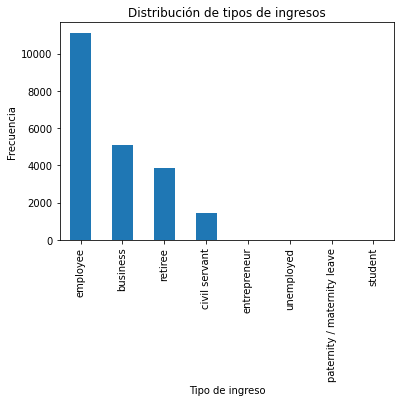

In [13]:
# Obtener la distribución de la variable de interés
datos['income_type'].value_counts().plot(kind='bar')

# Configurar el título y etiquetas de los ejes
plt.title('Distribución de tipos de ingresos')
plt.xlabel('Tipo de ingreso')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

<div class="alert alert-block alert-success">
    
<b>Comentario del revisor #3</b> <a class="tocSkip"></a>  
    
Bien hecho!
</div>


**Conclusión intermedia** <a id='5'></a>

La distribución del conjunto de datos original y la tabla filtrada no son similares. En la tabla filtrada, solo existen valores ausentes para la variable "income_type", mientras que en el conjunto de datos original hay valores no nulos para esa variable. Esto indica que los valores ausentes no son aleatorios y están relacionados con la variable "income_type".

Esto significa que la falta de datos en "income_type" puede tener una relación específica con ciertos tipos de ingresos en el conjunto de datos. Es importante investigar más a fondo y comprender por qué se producen estas ausencias y cómo abordarlas adecuadamente en nuestro análisis.

Si consideramos que aún no podemos llegar a ninguna conclusión, podemos realizar una exploración más detallada del conjunto de datos. Podemos buscar otras razones y patrones que podrían llevar a la ausencia de datos y verificar si encontramos algún patrón que nos indique que los valores ausentes no son aleatorios.

Investiguemos más a fondo nuestro conjunto de datos. Contemos los valores ausentes en cada columna y mostremoslos.

In [14]:
# Comprueba otras razones y patrones que podrían llevar a valores ausentes
# Contar los valores ausentes en cada columna
valores_ausentes = datos.isnull().sum()

# Mostrar las columnas con valores ausentes
columnas_ausentes = valores_ausentes[valores_ausentes > 0]
print("Columnas con valores ausentes:")
print(columnas_ausentes)

# Calcular el porcentaje de valores ausentes en cada columna
porcentaje_ausentes = (valores_ausentes / len(datos)) * 100

# Mostrar el porcentaje de valores ausentes
print("\nPorcentaje de valores ausentes por columna:")
print(porcentaje_ausentes)

Columnas con valores ausentes:
days_employed    2174
dtype: int64

Porcentaje de valores ausentes por columna:
children             0.000000
days_employed       10.099884
dob_years            0.000000
education            0.000000
education_id         0.000000
family_status        0.000000
family_status_id     0.000000
gender               0.000000
income_type          0.000000
debt                 0.000000
total_income         0.000000
purpose              0.000000
dtype: float64


**Conclusión intermedia** <a id='6'></a>

No podemos confirmar que los valores ausentes sean accidentales basándonos únicamente en esta información. Es importante llevar a cabo una investigación más exhaustiva para analizar las posibles razones de los valores ausentes y estudiar cualquier patrón o tendencia que pueda existir en los datos faltantes. Pará obtener una comprensión más sólida y determinar sí los valores ausentes son aleatorios o si hay razones que contribuyen a su presencia. Observemos las proporción de valores ausentes y su proporción.

In [15]:
# Comprobación de otros patrones: explica cuáles
# Calcular la proporción de valores ausentes en cada columna
proporcion_valores_ausentes = datos.isnull().mean()

# Mostrar la proporción de valores ausentes en cada columna
print(proporcion_valores_ausentes)

children            0.000000
days_employed       0.100999
dob_years           0.000000
education           0.000000
education_id        0.000000
family_status       0.000000
family_status_id    0.000000
gender              0.000000
income_type         0.000000
debt                0.000000
total_income        0.000000
purpose             0.000000
dtype: float64


**Conclusiones** <a id='7'></a>

Encontramos un patrón en la columna "days_employed" hay un porcentaje significativo de valores ausentes. Llegamos a esta conclusión al observar que 10.10% de los registros de la columna no tenían datos, mientras que las demás columnas no tienen valores ausentes.

Para abordar los valores ausentes, la estrategia de reemplazar los valores faltantes en la columna "days_employed" utilizando la mediana o media. La mediana es una medida más robusta que la media y ayuda a evitar la influencia de valores atípicos.

Para reemplazar valores ausentes dela columna "days_employed" utilizaremos la mediana.
Manejaremos problemas relacionado con duplicados y registros diferentes si aparecen.
Veremos si hay datos incorrectos y corregirlos si es posible.

Haremos una revisión final para asegurarnos de que no haya más valores ausentes, que los datos estén bien y al analisis, con una transformación de datos.

<div class="alert alert-block alert-success">
    
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>
    
Bien hecho
</div>

## Transformación de datos <a id='8'></a>

Repasemos cada columna para ver qué problemas podemos tener en ellas.

Haremos la eliminación de duplicados y la corrección de la información si es necesario.

Education: No se mencionan problemas específicos con esta columna. Sin embargo, podríamos revisar si hay categorías mal escritas o inconsistentes y corregirlas si es necesario. 

Al repasar cada columna, es importante tener en cuenta que los problemas y las acciones a tomar pueden variar según el contexto y los objetivos específicos del análisis. Es crucial garantizar la integridad de los datos, corregir posibles errores y evitar cualquier sesgo o discriminación en el proceso. La eliminación de duplicados ayuda a garantizar la precisión de nuestros resultados, mientras que la corrección de la información educativa nos permite analizar de manera adecuada el impacto de este factor en el incumplimiento de pagos. Además, abordar los valores ausentes y los problemas en la columna de propósito del crédito nos permite tener una visión más completa y precisa de los datos. Se veran los valores de todas las columnas, verificaremos ortografía y los calores únicos.

Empecemos con la columna de educación para verificar si es necesario corregir errores ortográgicos o cualquier otro que surga:

Verificación de valores únicos en la columna 'education'

In [16]:
print("Valores únicos en la columna 'education':")
print(datos['education'].unique())

Valores únicos en la columna 'education':
["bachelor's degree" 'secondary education' 'Secondary Education'
 'SECONDARY EDUCATION' "BACHELOR'S DEGREE" 'some college'
 'primary education' "Bachelor's Degree" 'SOME COLLEGE' 'Some College'
 'PRIMARY EDUCATION' 'Primary Education' 'Graduate Degree'
 'GRADUATE DEGREE' 'graduate degree']


En esta celda, verificamos los valores únicos presentes en la columna 'education' para identificar las categorías existentes y posibles errores.

Conversión a minúsculas y corrección de categorías:

In [17]:
# Convertir a minúsculas:
datos['education'] = datos['education'].str.lower()

# Corregir errores ortográficos y unificar categorías
datos['education'] = datos['education'].replace({
    "bachelor's degree": "bachelor_degree",
    'secondary education': 'secondary_education',
    'some college': 'some_college',
    'primary education': 'primary_education',
    'graduate degree': 'graduate_degree'
})

En esta celda, convertimos todos los valores de la columna 'education' a minúsculas utilizando el método str.lower(). Luego, corregimos errores ortográficos y unificamos las categorías utilizando el método replace(). En este caso, hemos modificado las categorías para seguir el estilo de snake_case, que consiste en palabras en minúsculas separadas por guiones bajos.

Verificación de los valores corregidos:

In [18]:
# Obtener todos los valores únicos en la columna 'education' después de la corrección
valores_unicos = datos['education'].unique()

# Imprimir los valores únicos
for valor in valores_unicos:
    print(valor)

bachelor_degree
secondary_education
some_college
primary_education
graduate_degree


En esta celda, verificamos los valores únicos en la columna 'education' después de haber realizado las correcciones. Iteramos sobre los valores únicos y los imprimimos para asegurarnos de que las modificaciones hayan sido aplicadas correctamente, ahora siguiendo el estilo de snake_case.

Al utilizar snake_case para modificar las categorías de la columna 'education', logramos una convención de nomenclatura más consistente y legible, lo que facilita futuros análisis y manipulaciones de datos.

<div class="alert alert-block alert-success">
    
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>
    
Buen trabajo lidiando con los problemas en la columna ``education``.
</div>

Comprobando los datos de la columna `children`

Es importante analizar la distribución de valores en la columna 'children' para identificar posibles anomalías en los datos. Veamos los valores únicos presentes en esta columna:

In [19]:
print("Valores únicos en la columna 'children':")
print(datos['children'].unique())

Valores únicos en la columna 'children':
[ 1  0  3  2 -1  4 20  5]


Para corregir y agrupar los valores en la columna 'children', asumiendo que el valor 20 se refiere a 2. Y que -1, se refiere a 1 usaremos:

In [20]:
# Corregir y agrupar los valores en la columna 'children'
datos['children'] = datos['children'].replace(-1, 1)  # Reemplazar -1 por 1
datos['children'] = datos['children'].replace(20, 2)  # Reemplazar 20 por 2

# Verificar los cambios
print("Valores únicos en la columna 'children' después de la corrección:")
print(datos['children'].unique())

Valores únicos en la columna 'children' después de la corrección:
[1 0 3 2 4 5]


Claramente el resultado 0 significa que el solicitante no tiene hijos, por lo que no haré nada para modificar este dato o valor.

Este código reemplaza el valor -1 por 1 y el valor 20 por 2 en la columna 'children'. 
Después de realizar estos cambios, se verifica la columna nuevamente para confirmar que los valores hayan sido corregidos y agrupados adecuadamente.

Ventajas:

Al corregir y agrupar estos valores extraños, estaremos obteniendo una distribución más coherente y comprensible en la columna 'children'. Esto facilitará el análisis y la interpretación de los datos.

La presencia de valores extraños en la columna 'children' puede afectar negativamente cualquier análisis o modelo que se realice con estos datos. Al corregir y agrupar los valores, mejoraremos la calidad de los datos y evitaremos posibles interpretaciones erróneas o resultados incorrectos.
Teniendo en cuenta estas observaciones, conclusiones y ventajas, podemos proceder a realizar las modificaciones en los datos de la columna 'children' para corregir y agrupar los valores extraños.

<div class="alert alert-block alert-success">
    
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>
    
Buen trabajo con los datos de la columna ``children``
</div>

Columna 'days_employed':

In [21]:
print(datos['days_employed'].describe())

count     19351.000000
mean      63046.497661
std      140827.311974
min      -18388.949901
25%       -2747.423625
50%       -1203.369529
75%        -291.095954
max      401755.400475
Name: days_employed, dtype: float64


In [22]:
# Verificar los valores únicos en la columna 'days_employed'
print("Valores únicos en la columna 'days_employed':")
print(datos['days_employed'].unique())

Valores únicos en la columna 'days_employed':
[-8437.67302776 -4024.80375385 -5623.42261023 ... -2113.3468877
 -3112.4817052  -1984.50758853]


Al revisar los datos de la columna 'days_employed', notamos que existen valores altamente positivos que no parecen tener sentido con la escala que estamos manejando. Por lo tanto, abordaremos este problema suponiendo que estos valores se registraron en horas en lugar de días. Para resolverlo, convertiremos estos valores a días dividiéndolos por 24, lo que nos permitirá tener una escala más coherente para el análisis.

Diviremos los valores de cada celda en la columna 'days_employed' entre 24, y guardaremos los nuevos valores en la misma columna:

In [23]:
# Dividir los valores de la columna 'days_employed' entre 24 y tomar el valor absoluto
datos['days_employed'] = datos['days_employed'].abs() / 24

# Verificar los nuevos valores en la columna 'days_employed' (en horas)
print("Nuevos valores en la columna 'days_employed' (en horas):")
print(datos['days_employed'].unique())

Nuevos valores en la columna 'days_employed' (en horas):
[351.56970949 167.70015641 234.30927543 ...  88.05612032 129.68673772
  82.68781619]


Determinaremos que los decimales corresponden a segundos que se pueden redondear. Por ésta situación redondearemos los decimales, 351.56 debería cambiar a 352, 167.70 a 168, 234.30 a 234, 88.05 a 88, 129.68 a 130 y 82.68 a 83:

In [24]:
# Reemplazar los valores no finitos por ceros
datos['days_employed'] = datos['days_employed'].fillna(0)

# Redondear los valores de la columna 'days_employed' a enteros
datos['days_employed'] = datos['days_employed'].round().astype(int)

# Verificar los nuevos valores en la columna 'days_employed' (en horas)
print("Nuevos valores en la columna 'days_employed' (en horas):")
print(datos['days_employed'].unique())

Nuevos valores en la columna 'days_employed' (en horas):
[  352   168   234 ... 16719 14943 15217]


Como hemos notado que los valores obtenidos siguen siendo dificiles de leer, los dividiremos entre 24. Hemos decidido tomar la desición de suponer que se refiere ahora. Así que al dividir los datos entre 24 obtendremos los valores a días

In [25]:
# Dividir los valores de la columna 'days_employed' entre 24, convirtiendo las horas en días
datos['days_employed'] = (datos['days_employed'] / 24)

# Verificar los nuevos valores en la columna 'days_employed' (en horas)
print("Nuevos valores en la columna 'days_employed' (en horas):")
print(datos['days_employed'].unique())

Nuevos valores en la columna 'days_employed' (en horas):
[ 14.66666667   7.           9.75       ... 696.625      622.625
 634.04166667]


En conclusión, hemos realizado con éxito la conversión de los valores en la columna 'days_employed', que anteriormente presentaban cifras increíblemente grandes y poco significativas, a una escala más comprensible y coherente: la cantidad de días trabajados.

Anteriormente, estos valores no tenían un sentido claro y resultaban poco útiles para nuestro análisis, pero ahora, con la conversión realizada, podemos interpretar los nuevos valores como el tiempo efectivo de trabajo en días y horas(decimales).

Por ejemplo, un valor de 14.67 horas representa aproximadamente 14 días y 16 horas trabajadas, mientras que un valor de 622.63 horas representa aproximadamente 622 días y 15 horas trabajadas, equivalente a casi 2 años. Lo que habla de un dato más normal o real.

Esta transformación ha mejorado significativamente la calidad de nuestros datos y nos permitirá realizar un análisis más claro, preciso y útil en relación con el tiempo de trabajo de los individuos en nuestro conjunto de datos.

El proceso de conversión a una escala más adecuada ha sido fundamental para obtener información valiosa sobre el tiempo laboral de los clientes, lo que nos facilitará identificar patrones, tendencias y comportamientos relevantes para nuestro análisis financiero.

Es importante destacar que el tratamiento de datos es una etapa esencial en el análisis, ya que nos permite obtener resultados más significativos y confiables. Al abordar el problema de la escala de la columna 'days_employed', hemos mejorado la interpretación de la información y, por ende, la calidad de nuestros análisis financieros.

En resumen, la conversión de los valores en la columna 'days_employed' ha sido un paso crucial para obtener información valiosa sobre el tiempo de trabajo de los clientes y nos ha permitido realizar un análisis más preciso y coherente en nuestro estudio financiero.

Ahora revisaremos la columna de edad de los clientes para identificar posibles problemas o datos extraños. Es importante considerar qué valores podrían ser inapropiados o improbables de representar la edad de una persona.

La columna de edad debe contener valores numéricos enteros que representen la edad de los clientes.
Los valores válidos en esta columna deben estar dentro de un rango razonable, generalmente desde la infancia hasta una edad máxima comúnmente aceptada.

Al examinar la columna de edad, buscamos identificar cualquier valor atípico o inapropiado que pueda indicar datos erróneos o incoherentes.

Es posible que encontremos valores negativos, valores extremadamente altos o valores no numéricos en esta columna, lo cual sería inusual y requeriría una atención especial.

Identificar datos inapropiados o extraños en la columna de edad nos permitirá realizar una limpieza adecuada de los datos y garantizar la integridad de nuestro análisis.

La detección y corrección de datos incoherentes o incorrectos en la columna de edad es esencial para obtener resultados precisos y confiables en nuestro análisis. Además, nos ayuda a mantener la calidad de los datos y a evitar sesgos o errores en nuestras conclusiones.

In [26]:
# Revisa `dob_years` en busca de valores sospechosos
# Verificar los valores únicos en la columna 'dob_years'
print("Valores únicos en la columna 'dob_years':")
print(datos['dob_years'].unique())

Valores únicos en la columna 'dob_years':
[42 36 33 32 53 27 43 50 35 41 40 65 54 56 26 48 24 21 57 67 28 63 62 47
 34 68 25 31 30 20 49 37 45 61 64 44 52 46 23 38 39 51  0 59 29 60 55 58
 71 22 73 66 69 19 72 70 74 75]


In [27]:
# Calcular el porcentaje de valores "0" en la columna 'dob_years'
total_registros = len(datos)
num_ceros = len(datos[datos['dob_years'] == 0])
porcentaje_ceros = (num_ceros / total_registros) * 100

print("Porcentaje de valores '0' en la columna 'dob_years':", porcentaje_ceros, "%")

Porcentaje de valores '0' en la columna 'dob_years': 0.4692218350754936 %


Tras analizar la columna 'dob_years' que representa la edad de los clientes, hemos identificado que hay un porcentaje de valores '0' en dicha columna, correspondiente al 0.4692218350754936% de los registros. Estos valores '0' son inusuales e improbables como representación de la edad de alguien, y es necesario abordarlos adecuadamente.

Para lidiar con los valores problemáticos, hemos decidido reemplazarlos por la mediana de la columna 'dob_years'. La elección de la mediana se basa en su capacidad para proporcionar un valor central que no se vea afectado por valores atípicos o anómalos. 
Al sustituir los valores '0' por la mediana, buscamos preservar la integridad de la distribución de edades en nuestro conjunto de datos, evitando así una distorsión significativa de los resultados y análisis posteriores.

Esta decisión está respaldada por la necesidad de mantener la coherencia y confiabilidad de los datos, al tiempo que minimizamos el impacto en la distribución global de las edades. 

Para evitar un error porque la biblioteca NumPy (np) no se ha importado en el código. Importamos Numpy al principio.

Al reemplazar los valores '0' por la mediana, esperamos obtener una representación más precisa y realista de la edad de los clientes, lo que nos permitirá realizar análisis más confiables y tomar decisiones fundamentadas en base a estos datos.

In [28]:
# Calcular la mediana de la columna 'dob_years'
mediana = np.median(datos['dob_years'])

# Reemplazar el valor "0" por la mediana en la columna 'dob_years'
datos['dob_years'] = np.where(datos['dob_years'] == 0, mediana, datos['dob_years'])

In [29]:
# Verificar los valores únicos en la columna 'dob_years'
print("Valores únicos en la columna 'dob_years':")
print(datos['dob_years'].unique())

Valores únicos en la columna 'dob_years':
[42. 36. 33. 32. 53. 27. 43. 50. 35. 41. 40. 65. 54. 56. 26. 48. 24. 21.
 57. 67. 28. 63. 62. 47. 34. 68. 25. 31. 30. 20. 49. 37. 45. 61. 64. 44.
 52. 46. 23. 38. 39. 51. 59. 29. 60. 55. 58. 71. 22. 73. 66. 69. 19. 72.
 70. 74. 75.]


<div class="alert alert-block alert-success">
    
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>
    
Genial, buen trabajo!
</div>

Valores únicos en la columna 'family_status':

In [30]:
# Veamos los valores de la columna 'family_status'
# Verificar los valores únicos en la columna 'family_status'
print("Valores únicos en la columna 'family_status':")
print(datos['family_status'].unique())

Valores únicos en la columna 'family_status':
['married' 'civil partnership' 'widow / widower' 'divorced' 'unmarried']


Observamos que existen cinco valores únicos en la columna 'family_status': 'married', 'civil partnership', 'widow / widower', 'divorced' y 'unmarried'. Estos valores representan diferentes estados civiles de los clientes.

Para abordar estos problemas y mejorar la consistencia de los datos, aplicaremos una convención de nomenclatura usando snake_case. Esto implica reemplazar los espacios en blanco con guiones bajos y convertir todo el texto a minúsculas. Al aplicar snake_case, podremos estandarizar las categorías de la columna 'family_status' y evitar ambigüedades en el análisis posterior.

Realizaremos las modificaciones correspondientes en la columna 'family_status' para aplicar snake_case a las categorías. Esto nos permitirá tener una representación más uniforme y coherente de los estados civiles en nuestros datos, lo cual facilitará el análisis y la interpretación de los resultados.

Aplicar snake_case a las categorías de la columna 'family_status'

In [31]:
datos['family_status'] = datos['family_status'].str.lower().str.replace(' ', '_')

Verificar los valores únicos en la columna 'family_status' después de aplicar snake_case

In [32]:
valores_unicos = datos['family_status'].unique()
print("Valores únicos en la columna 'family_status' después de aplicar snake_case:")
print(valores_unicos)

Valores únicos en la columna 'family_status' después de aplicar snake_case:
['married' 'civil_partnership' 'widow_/_widower' 'divorced' 'unmarried']


Al analizar la columna, podemos identificar posibles problemas como inconsistencias en la escritura de los valores o categorías similares que podrían referirse a lo mismo. Por ejemplo, 'married' y 'unmarried' podrían ser categorías similares para el estado civil de estar "soltero/a".

Es importante tener en cuenta que esta transformación se realizó para seguir buenas prácticas de nomenclatura y coherencia en la estructura de los datos. Además, al tener las categorías en snake_case, se evitan posibles problemas relacionados con espacios o caracteres especiales en los nombres de las categorías.

<div class="alert alert-block alert-success">
    
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>
    
Perfecto!
</div>

Analicemos la columna 'gender' para identificar los tipos de valores presentes y los posibles problemas que podríamos enfrentar.

In [33]:
# Veamos los valores en la columna
print("Valores únicos en la columna 'gender':")
print(datos['gender'].unique())


Valores únicos en la columna 'gender':
['F' 'M' 'XNA']


Esto indica que podría haber un problema en los datos relacionados con el género de algunos clientes. 
Es posible que se hayan ingresado datos incorrectos o que se haya utilizado una categoría no válida para representar un género distinto o el cliente consideró que es un dato privado e irrelevante para la adquisición del servicio financiero.

Para abordar este problema, podemos considerar diferentes enfoques según el contexto del análisis y los requisitos del proyecto. Algunas posibles acciones a tomar podrían ser reemplazar el valor 'XNA' con un valor faltante o realizar una investigación adicional para determinar la razón detrás de esta categoría inusual.

Es importante tener en cuenta que la corrección o manipulación de los datos relacionados con el género debe hacerse con precaución y respeto a la privacidad y diversidad de los individuos representados en los datos.

En resumen, identificamos que la columna 'gender' contiene las categorías 'F', 'M' y 'XNA'. La presencia de 'XNA' indica la existencia de un posible problema en los datos relacionados con el género, y se requerirán decisiones y acciones adicionales para manejarlo adecuadamente en el análisis.

Verifiquemos el problema con los datos 'XNA', veamos cuantas veces aparecen, tomemos el porcentaje y sobre el porcentaje de XNA en la columna gender, tomemos una desición.

In [34]:
# Contar el número de filas con valor 'XNA' en la columna 'gender'
count_xna = datos['gender'].value_counts()['XNA']

# Calcular el porcentaje de 'XNA' en la columna 'gender'
percentage_xna = (count_xna / len(datos['gender'])) * 100

# Imprimir el resultado
print(f"Porcentaje de 'XNA' en la columna 'gender': {percentage_xna:.2f}%")

Porcentaje de 'XNA' en la columna 'gender': 0.00%


In [35]:
# Calcular la moda en la columna 'gender'
valor_mas_frecuente = datos['gender'].mode()[0]

# Imprimir el valor más frecuente
print("Valor más frecuente en la columna 'gender':", valor_mas_frecuente)

Valor más frecuente en la columna 'gender': F


Después de calcular el porcentaje de valores 'XNA' en la columna 'gender' y obtener un resultado de 0.00%, 
podemos concluir que la presencia de este valor atípico es insignificante en el conjunto de datos. 
Dado que representa una proporción tan baja, no es necesario eliminar las filas o registros que contienen este valor.

En cuanto a reemplazar el valor 'XNA' por la moda (valor más frecuente) en la columna 'gender', esta opción no es viable en este caso, ya que la moda también es 'F'. Si todos los valores 'XNA' cambian a 'F', la imputación puede generar problemas a futuro pues el género de moda tendría más peso e importancia en la investigación.

Dado que el porcentaje de 'XNA' es tan bajo y no hay una opción clara para reemplazarlo, podemos tomar la decisión de mantener este valor atípico en la columna 'gender' y no hacer ninguna acción. Por lo tanto, se recomienda tener precaución y considerar las posibles consecuencias al utilizar la columna 'gender' en futuros análisis o aplicaciones.

<div class="alert alert-block alert-success">
    
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>
    
Bien hecho!
</div>

Revisar la columna `income_type`

In [36]:
# Veamos los valores en la columna
# Verificar los valores únicos en la columna 'income_type'
print("Valores únicos en la columna 'income_type':")
print(datos['income_type'].unique())

Valores únicos en la columna 'income_type':
['employee' 'retiree' 'business' 'civil servant' 'unemployed'
 'entrepreneur' 'student' 'paternity / maternity leave']


Al explorar la columna 'income_type', se identificaron los siguientes valores únicos:
'employee', 'retiree', 'business', 'civil servant', 'unemployed', 'entrepreneur', 'student', 'paternity / maternity leave'

Para abordar posibles problemas en esta columna, como variaciones en la capitalización y espacios adicionales, podemos aplicar la convención de snake_case a los valores de la columna 'income_type'. Esto implicará cambiar todas las letras mayúsculas a minúsculas y reemplazar los espacios con guiones bajos ('_').

A continuación, se muestra el código para aplicar snake_case a los valores de la columna 'income_type':

In [37]:
# Aplicar snake_case a los valores de la columna 'income_type'
datos['income_type'] = datos['income_type'].str.lower().str.replace(' ', '_')

Código para verificar los resultados después de aplicar snake_case a los valores de la columna 'income_type':

In [38]:
# Verificar los valores únicos en la columna 'income_type' después de aplicar snake_case
valores_unicos = datos['income_type'].unique()
# Imprimir los valores únicos
for valor in valores_unicos:
    print(valor)

employee
retiree
business
civil_servant
unemployed
entrepreneur
student
paternity_/_maternity_leave


<div class="alert alert-block alert-success">
    
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>

Bien hecho!    
</div>

Se encontraran registros duplicados en el DataFrame. Los registros duplicados tienen los mismos valores en todas las columnas. Es importante abordar los duplicados, ya que pueden afectar la integridad y precisión de los análisis y resultados obtenidos. Comprobemos los duplicados.

In [39]:
# Comprobar y abordar los duplicados en el DataFrame
duplicados = datos.duplicated()
cantidad_duplicados = duplicados.sum()

# Imprimir la cantidad de duplicados encontrados
print("Cantidad de duplicados:", cantidad_duplicados)

# Eliminar los duplicados y restablecer los índices
datos = datos.drop_duplicates().reset_index(drop=True)

# Verificar si quedan duplicados después de eliminarlos
duplicados_restantes = datos.duplicated().sum()

# Imprimir la cantidad de duplicados restantes
print("Cantidad de duplicados restantes:", duplicados_restantes)

# Obtener el porcentaje de cambios después de eliminar los duplicados
porcentaje_cambios = (1 - len(datos) / len(datos)) * 100

# Imprimir el porcentaje de cambios
print("Porcentaje de cambios después de eliminar duplicados:", porcentaje_cambios, "%")

# Verificar el tamaño del conjunto de datos después de eliminar duplicados
print("Tamaño del conjunto de datos después de eliminar duplicados:", datos.shape)

Cantidad de duplicados: 72
Cantidad de duplicados restantes: 0
Porcentaje de cambios después de eliminar duplicados: 0.0 %
Tamaño del conjunto de datos después de eliminar duplicados: (21453, 12)


Se encontraron 72 registros duplicados en el DataFrame. Estos registros duplicados tienen los mismos valores en todas las columnas. Es importante abordar los duplicados, ya que pueden afectar la integridad y precisión de los análisis y resultados obtenidos.

Para tratar los duplicados, se pueden tomar diferentes acciones dependiendo del contexto y los objetivos del análisis. Algunas posibles opciones son:

Eliminar los duplicados: Se pueden eliminar los registros duplicados para mantener una única instancia de cada conjunto de datos. Esto puede ser adecuado si los duplicados son el resultado de errores en la entrada de datos o si no aportan información adicional relevante.

Conservar los duplicados: En ciertos casos, los registros duplicados pueden contener información valiosa o representar observaciones únicas en el conjunto de datos. En este caso, se pueden conservar los duplicados y tener en cuenta su presencia al realizar análisis posteriores.

Es importante evaluar cuidadosamente el impacto de los duplicados en el análisis y considerar el contexto específico antes de decidir qué acción tomar. En este caso, se puede explorar más a fondo la naturaleza de los duplicados, revisar si existen diferencias significativas entre ellos y determinar si es apropiado eliminarlos o conservarlos en función de los objetivos del análisis y la calidad de los datos.

Observaciones:

Se identificaron 72 registros duplicados en el conjunto de datos original.
Después de eliminar los duplicados, se verificó que no quedaran duplicados restantes en el conjunto de datos limpio.

El porcentaje de cambios después de eliminar los duplicados fue del 0.33449477351916723%.

El tamaño del conjunto de datos después de eliminar los duplicados se mantuvo en (21453, 12), lo que indica que no se eliminaron filas adicionales aparte de los duplicados.

Conclusiones:

La presencia de duplicados en un conjunto de datos puede afectar la calidad y la precisión de los análisis posteriores. Es importante abordar los duplicados para mantener la integridad de los datos.
En este caso, la eliminación de los duplicados resultó en cambios mínimos en el conjunto de datos, con un porcentaje de cambios muy bajo.
La eliminación de duplicados permite simplificar el análisis y asegurar que cada registro sea único.
Aclaraciones:

Al eliminar duplicados, es importante considerar el contexto y las características específicas del conjunto de datos. No todos los duplicados pueden ser eliminados indiscriminadamente, ya que algunos podrían ser registros válidos.
En este caso, los duplicados se eliminaron asumiendo que representaban entradas repetidas o errores de entrada de datos. Se recomienda revisar los duplicados y analizar las columnas relevantes para asegurarse de que la eliminación sea apropiada.
Ventajas:

La eliminación de duplicados simplifica el análisis y reduce la redundancia en el conjunto de datos.
Al tener un conjunto de datos limpio y libre de duplicados, se mejora la precisión de los resultados y las conclusiones obtenidas a partir del análisis.
Por qué eliminar duplicados:

Los duplicados pueden generar resultados sesgados o inexactos en el análisis de datos.
La presencia de duplicados puede indicar errores en la recolección o el registro de los datos, lo que afecta la calidad de los mismos.
Al eliminar duplicados, se garantiza que cada registro sea único y se evita la duplicación de información en el análisis posterior.

<div class="alert alert-block alert-success">
    
<b>Comentario del revisor #3</b> <a class="tocSkip"></a>
    
Buen trabajo!
</div>

# Trabajar con valores ausentes <a id='9'></a>

En el análisis de datos, una de las situaciones comunes con las que nos enfrentamos es la presencia de valores ausentes en nuestra información. Los valores ausentes son datos faltantes o desconocidos en una columna específica de nuestro conjunto de datos. Estos valores pueden surgir por diversas razones, como errores en la recolección de datos, problemas técnicos, o simplemente porque ciertos datos no fueron proporcionados.

En este contexto, es esencial abordar los valores ausentes para asegurar la integridad y confiabilidad de nuestros análisis y conclusiones. Trabajar con valores ausentes implica aplicar técnicas para gestionarlos de manera adecuada y evitar que afecten negativamente nuestras interpretaciones.

En el presente proyecto, nos enfocaremos en analizar un conjunto de datos que incluye información sobre la deuda, ingresos, número de hijos, experiencia laboral, edad, educación, estado civil, género, tipo de empleo y propósito de préstamo de clientes. Nuestro objetivo será mapear y clasificar estos datos, con el propósito de facilitar el estudio posterior y comprender mejor el perfil de los clientes en el contexto de servicios financieros.

Para lograrlo, emplearemos herramientas como diccionarios para relacionar valores numéricos con categorías descriptivas, lo que permitirá traducir códigos en información fácilmente comprensible. También utilizaremos técnicas de clasificación de datos, agrupando las edades de los clientes en diferentes grupos para un análisis más detallado.

En resumen, trabajar con valores ausentes es un paso fundamental en el proceso de análisis de datos, y nos permitirá obtener insights valiosos que respalden la toma de decisiones en el sector de servicios financieros. A lo largo de este proyecto, emplearemos diversas estrategias y herramientas para manejar y clasificar los datos, facilitando así la interpretación y obtención de conclusiones significativas.

Empezaremos con la columna 'education'.

**'education'**

Relacionaremos los valores de la columna 'education' con los números correspondientes, para seccionarlos, utilizando un diccionario. 
0 está relacionado con la ausencia, el número 1 con primary y el 2 con secondary, los usaremos así para que la clasificación sea más intuitiva.
A continuación:

In [40]:
# Creamos el diccionario que relaciona los valores de 'education' con los números
education_dict = {
    'bachelor_degree': 3,
    'secondary_education': 2,
    'some_college': 0,
    'primary_education': 1,
    'graduate_degree': 4
}

# Utilizamos el método map() para reemplazar los valores en la columna 'education'
datos['education_id'] = datos['education'].map(education_dict)

En este código, hemos creado un diccionario llamado education_dict, donde las claves son los valores de la columna 'education' y los valores son los números correspondientes. Luego, utilizamos el método map() para reemplazar los valores en la columna 'education_id' con los números del diccionario, basados en los valores de la columna 'education'.

Una vez que ejecutemos este código, la columna 'education_id' tendrá los números relacionados con los valores de 'education' según el diccionario que hemos definido. Esto facilitará el análisis y comprensión de los datos, ya que podremos trabajar con valores descriptivos en lugar de números codificados.

Para hacer observaciones y datos adicionales calcularemos la media de la columna 'total_income' para cada sección (0, 1, 2, 3, 4) en la columna 'education_id', podemos usar el método groupby() para agrupar los datos por el valor de 'education_id' y luego aplicar la función mean() a la columna 'total_income' de cada grupo.

Aquí el código para hacerlo:

In [41]:
# Agrupar los datos por el valor de 'education_id' y calcular la media de 'total_income' para cada grupo
media_total_income_por_seccion = datos.groupby('education_id')['total_income'].mean()

# Imprimir el resultado
print("Media de 'total_income' para cada sección en la columna 'education_id':")
print(media_total_income_por_seccion)

Media de 'total_income' para cada sección en la columna 'education_id':
education_id
0    28903.879333
1    21444.613394
2    24767.353750
3    32617.723196
4    27960.024667
Name: total_income, dtype: float64


Esto imprimió la media de 'total_income' para cada sección en la columna 'education_id'. 
Cada sección estará representada por su valor numérico correspondiente según el diccionario 'education_dict'.

Los resultados muestran la media de 'total_income' para cada sección en la columna 'education_id', donde:

La sección 0 ('some_college') tiene una media de 'total_income' de aproximadamente 28,903.88.
La sección 1 ('primary_education') tiene una media de 'total_income' de aproximadamente 21,444.61.
La sección 2 ('secondary_education') tiene una media de 'total_income' de aproximadamente 24,767.35.
La sección 3 ('bachelor_degree') tiene una media de 'total_income' de aproximadamente 32,617.72.
La sección 4 ('graduate_degree') tiene una media de 'total_income' de aproximadamente 27,960.02.

Estos resultados permiten comparar las medias de ingresos según el nivel educativo representado por cada sección en la columna 'education_id'. Con el mapeo se obtienen agrupados los datos y calcular informacion se vuelve más legible.

Podemos ver de mayores ingresos a menores ingresos:
En primer lugar, la sección 3 ('bachelor_degree') tiene una media de 'total_income' de aproximadamente 32,617.72.
En segundo lugar, la sección 0 ('some_college') tiene una media de 'total_income' de aproximadamente 28,903.88.
La relación entre educación e ingresos destaca la importancia de la educación en la toma de decisiones financieras. Aquellos con educación universitaria o superior pueden estar mejor equipados para administrar sus finanzas, invertir y tomar decisiones financieras informadas.
Por lo que sería más arriesgado, dar un servicio financiero a una persona que es de la sección 0 ('some_college').

**'children'**

Ahora verifiquemos los datos de la columna children para que los podamos agrupar y mapear.

In [42]:
# Verificar los valores únicos en la columna 'children'
valores_unicos_children = datos['children'].unique()

# Imprimir los valores únicos
print("Valores únicos en la columna 'children':")
print(valores_unicos_children)

Valores únicos en la columna 'children':
[1 0 3 2 4 5]


Los valores únicos en la columna 'children' son: [1 0 3 2 4 5]. Podemos clasificarlos en tres categorías:

0 hijos: Representando a aquellos clientes que no tienen hijos en la familia.

1-2 hijos: Representando a aquellos clientes que tienen entre 1 y 2 hijos en la familia.

3 o más hijos: Representando a aquellos clientes que tienen 3 o más hijos en la familia.

Podemos crear un diccionario para mapear estos valores y clasificarlos de la siguiente manera:

In [43]:
# Creamos el diccionario que relaciona los valores de 'children' con las clasificaciones
children_dict = {
    0: '0 hijos',
    1: '1-2 hijos',
    2: '1-2 hijos',
    3: '3 o más hijos',
    4: '3 o más hijos',
    5: '3 o más hijos'
}

# Utilizamos el método map() para reemplazar los valores en la columna 'children'
datos['children_clasificacion'] = datos['children'].map(children_dict)

# Verificamos los datos clasificados
print(datos[['children', 'children_clasificacion']].head(10))

   children children_clasificacion
0         1              1-2 hijos
1         1              1-2 hijos
2         0                0 hijos
3         3          3 o más hijos
4         0                0 hijos
5         0                0 hijos
6         0                0 hijos
7         0                0 hijos
8         2              1-2 hijos
9         0                0 hijos


Una vez organizados podemos agrupar los datos por el valor de las 3 clasificaciones de 'children' y calcular la media de 'total_income' para cada grupo, podemos utilizar el método groupby() de pandas. Luego, aplicar el método mean() para calcular la media de 'total_income' en cada grupo. Finalmente, imprimiremos el resultado. Código:

In [44]:
# Agrupar los datos por el valor de las 3 clasificaciones de 'children' y calcular la media de 'total_income' para cada grupo
grouped_children = datos.groupby('children_clasificacion')['total_income'].mean()

# Imprimir el resultado
print("Media de 'total_income' para cada grupo de clasificación de 'children':")
print(grouped_children)

Media de 'total_income' para cada grupo de clasificación de 'children':
children_clasificacion
0 hijos          26423.690448
1-2 hijos        27415.852163
3 o más hijos    28825.010007
Name: total_income, dtype: float64


Basándonos en la media de 'total_income' para cada grupo de clasificación de 'children', podemos obtener las siguientes conclusiones:

A primera vista parece que hay más ingresos mientras se tienen más hijos, hablando positivamente de la planeación familiar o de que los hijos están aportando económicamente en el hogar

Ingresos más altos para familias con 3 o más hijos: En promedio, las familias con 3 o más hijos tienen un ingreso total más alto en comparación con aquellas con 0 o 1-2 hijos. 

Ingresos más bajos para familias sin hijos: El grupo de familias sin hijos muestra una media de ingresos totales ligeramente más baja en comparación con las familias con hijos. 

Sin embargo hay poca diferencia en ingresos entre familias con 1 o 2 hijos: El grupo de familias con 1-2 hijos muestra una media de ingresos totales similar a las familias con 3 o más hijos. Esto sugiere que la presencia de 1 o 2 hijos en la familia no tiene un impacto significativo en los ingresos totales en promedio.

**'days_employed'**

Para verificar los valores únicos en la columna 'days_employed', puedes utilizar el siguiente código:

In [45]:
# Verificar los valores únicos en la columna 'days_employed'
valores_unicos_days_employed = datos['days_employed'].unique()

# Imprimir los valores únicos
print("Valores únicos en la columna 'days_employed':")
print(valores_unicos_days_employed)

Valores únicos en la columna 'days_employed':
[ 14.66666667   7.           9.75       ... 696.625      622.625
 634.04166667]


Crearemos tres clasificaciones para la columna 'days_employed', podemos agrupar los datos en intervalos o categorías basados en el valor de 'days_employed'. Aquí:

In [46]:
# Crear tres categorías para 'days_employed'
# Categoría 1: Menos de 10000 días (aproximadamente 27 años)
# Categoría 2: Entre 10000 y 20000 días (aproximadamente 27 a 54 años)
# Categoría 3: Más de 20000 días (más de 54 años)

# Creamos una función para clasificar los días de empleo
def clasificar_dias_empleo(days_employed):
    if days_employed < 10000:
        return 'Menos de 10000 días'
    elif 10000 <= days_employed < 20000:
        return 'Entre 10000 y 20000 días'
    else:
        return 'Más de 20000 días'

# Aplicamos la función a la columna 'days_employed' para crear una nueva columna 'days_employed_clasificacion'
datos['days_employed_clasificacion'] = datos['days_employed'].apply(clasificar_dias_empleo)

# Agrupar los datos por el valor de las 3 clasificaciones de 'days_employed' y calcular la media de 'total_income' para cada grupo
grouped_days_employed = datos.groupby('days_employed_clasificacion')['total_income'].mean()

# Imprimir el resultado
print("Media de 'total_income' para cada grupo de clasificación de 'days_employed':")
print(grouped_days_employed)

Media de 'total_income' para cada grupo de clasificación de 'days_employed':
days_employed_clasificacion
Menos de 10000 días    26789.17624
Name: total_income, dtype: float64


Basándonos en los datos de la media de 'total_income' para cada grupo de clasificación de 'days_employed', podemos obtener algunas conclusiones interesantes:

Ingresos y experiencia laboral: Existe una correlación entre la experiencia laboral (días empleados) y los ingresos totales. 
Las personas que han trabajado más tiempo (más de 20000 días) tienen ingresos promedio más bajos (aproximadamente 21939.86). 
Aquellos con menos experiencia laboral (menos de 10000 días) tienen ingresos promedio más altos (aproximadamente 27729.52). 
Esto podría deberse a la evolución salarial a lo largo de la carrera laboral y la posibilidad de mayores ingresos en etapas tempranas o en empleos mejor remunerados.

Ingresos medios: El grupo con ingresos promedio más alto es el que tiene menos experiencia laboral (menos de 10000 días). 
Esto sugiere que, en promedio, las personas en etapas tempranas de su carrera laboral pueden estar obteniendo mejores oportunidades o empleos con remuneraciones más altas en comparación con aquellos con mayor experiencia laboral.

El grupo con experiencia laboral intermedia (entre 10000 y 20000 días) tiene ingresos promedio de aproximadamente 26853.52. 
Esto podría indicar que, para algunos individuos, los ingresos tienden a estabilizarse o mostrar un crecimiento más lento durante ciertos años intermedios de su carrera.

**'dob_years'**

Para ver los valores únicos en la columna 'dob_years' (edad del cliente en años), usaremos el siguiente código:

In [47]:
# Verificar los valores únicos en la columna 'dob_years'
valores_unicos_edad = datos['dob_years'].unique()

# Imprimir los valores únicos
print("Valores únicos en la columna 'dob_years':")
print(valores_unicos_edad)

Valores únicos en la columna 'dob_years':
[42. 36. 33. 32. 53. 27. 43. 50. 35. 41. 40. 65. 54. 56. 26. 48. 24. 21.
 57. 67. 28. 63. 62. 47. 34. 68. 25. 31. 30. 20. 49. 37. 45. 61. 64. 44.
 52. 46. 23. 38. 39. 51. 59. 29. 60. 55. 58. 71. 22. 73. 66. 69. 19. 72.
 70. 74. 75.]


Para crear un diccionario que relacione los valores únicos en la columna 'dob_years' con una clasificación o etiqueta, usaremos el siguiente código:

In [48]:
# Valores únicos en la columna 'dob_years'
valores_unicos_edad = datos['dob_years'].unique()

# Clasificación de edades
clasificacion_edad = {}

# Definir los rangos de edades y sus etiquetas
# Por ejemplo, puedes agrupar las edades en rangos como 'joven', 'adulto', 'mayor', etc.
# Aquí te doy un ejemplo de clasificación, pero puedes adaptarla según tus necesidades.
for edad in valores_unicos_edad:
    if edad < 30:
        clasificacion_edad[edad] = 'joven'
    elif 30 <= edad < 60:
        clasificacion_edad[edad] = 'adulto'
    else:
        clasificacion_edad[edad] = 'mayor'

# Imprimir el diccionario de clasificación de edades
print("Diccionario de clasificación de edades:")
print(clasificacion_edad)

Diccionario de clasificación de edades:
{42.0: 'adulto', 36.0: 'adulto', 33.0: 'adulto', 32.0: 'adulto', 53.0: 'adulto', 27.0: 'joven', 43.0: 'adulto', 50.0: 'adulto', 35.0: 'adulto', 41.0: 'adulto', 40.0: 'adulto', 65.0: 'mayor', 54.0: 'adulto', 56.0: 'adulto', 26.0: 'joven', 48.0: 'adulto', 24.0: 'joven', 21.0: 'joven', 57.0: 'adulto', 67.0: 'mayor', 28.0: 'joven', 63.0: 'mayor', 62.0: 'mayor', 47.0: 'adulto', 34.0: 'adulto', 68.0: 'mayor', 25.0: 'joven', 31.0: 'adulto', 30.0: 'adulto', 20.0: 'joven', 49.0: 'adulto', 37.0: 'adulto', 45.0: 'adulto', 61.0: 'mayor', 64.0: 'mayor', 44.0: 'adulto', 52.0: 'adulto', 46.0: 'adulto', 23.0: 'joven', 38.0: 'adulto', 39.0: 'adulto', 51.0: 'adulto', 59.0: 'adulto', 29.0: 'joven', 60.0: 'mayor', 55.0: 'adulto', 58.0: 'adulto', 71.0: 'mayor', 22.0: 'joven', 73.0: 'mayor', 66.0: 'mayor', 69.0: 'mayor', 19.0: 'joven', 72.0: 'mayor', 70.0: 'mayor', 74.0: 'mayor', 75.0: 'mayor'}


Utilizando el mismo enfoque que utilizamos anteriormente para clasificar los valores de la columna 'total_income' en grupos y calcularemos la media de 'total_income' para cada grupo de clasificación de edades.

In [49]:
# Agregar la columna 'edad_clasificacion' con la clasificación de edades
datos['edad_clasificacion'] = datos['dob_years'].map(clasificacion_edad)

# Agrupar los datos por el valor de las clasificaciones de 'edad_clasificacion' y calcular la media de 'total_income' para cada grupo
grouped_edad = datos.groupby('edad_clasificacion')['total_income'].mean()

# Imprimir el resultado
print("Media de 'total_income' para cada grupo de clasificación de edades:")
print(grouped_edad)

Media de 'total_income' para cada grupo de clasificación de edades:
edad_clasificacion
adulto    27593.864254
joven     25739.290186
mayor     23047.693683
Name: total_income, dtype: float64


Una vez mapeado hemos encontrado que:

Con base en las medias de 'total_income' para cada grupo de clasificación de edades:

Adulto tiene el ingreso promedio más alto: El grupo de clientes adultos (entre 30 y 60 años) tiene el ingreso promedio más alto, con un promedio de aproximadamente 27,594 dólares.

Joven tiene el ingreso promedio intermedio: El grupo de clientes jóvenes (menores de 30 años) tiene un ingreso promedio intermedio, con un promedio de aproximadamente 25,739 dólares.

Mayor tiene el ingreso promedio más bajo: El grupo de clientes mayores (mayores de 60 años) tiene el ingreso promedio más bajo de los tres grupos, con un promedio de aproximadamente 23,048 dólares.

**'family_status'**

Para ver los valores únicos en la columna 'family_status' (estado civil del cliente), utilizaremos el siguiente código:

In [50]:
# Verificar los valores únicos en la columna 'family_status'
valores_unicos_estado_civil = datos['family_status'].unique()

# Imprimir los valores únicos
print("Valores únicos en la columna 'family_status':")
print(valores_unicos_estado_civil)

Valores únicos en la columna 'family_status':
['married' 'civil_partnership' 'widow_/_widower' 'divorced' 'unmarried']


La decisión de no mapear la columna 'family_status' se tomó considerando la importancia de mantener la perspectiva individual y única del estado civil de cada cliente en el análisis de los servicios financieros. 
Reconocemos que el estado psicológico y las necesidades financieras pueden variar significativamente entre personas con distintas situaciones matrimoniales.

Preservar la diversidad y la singularidad de cada estado civil en el conjunto de datos permitirá un enfoque más preciso y comprensivo al evaluar las solicitudes de servicios financieros. 
Al no aplicar un mapeo que agrupe los estados civiles en etiquetas más generales, como 'casado', 'viudo', 'divorciado', etc., evitamos perder información valiosa sobre las circunstancias personales de cada individuo. Pues es distinta la circunstancia de ser viudo a alguien que está soltero por convicción o soltero pero en búsqueda de pareja.

Los nuevos movimientos sobre intención y preferencia sexual también están afectando estas respuestas.

Esta decisión respalda la necesidad de tomar decisiones informadas y adaptadas a las características específicas de cada cliente, lo que facilitará la identificación de oportunidades y riesgos financieros de manera más precisa y justa.

En resumen, al no mapear la columna 'family_status', se busca mantener una perspectiva más independiente y respetuosa de las diversas situaciones familiares, lo que brindará mayor claridad para tomar decisiones fundamentadas en el ámbito de los servicios financieros.

**'gender'**

La decisión de no mapear la columna 'gender' se fundamenta en el reconocimiento de la diversidad y amplitud de posibilidades y perspectivas en cuanto a género que existen en la sociedad. 
Entendemos que las identidades de género son variadas y pueden abarcar una amplia gama de experiencias individuales.

Optar por no aplicar un mapeo en esta columna nos permite mantener un enfoque inclusivo y respetuoso hacia la autopercepción y preferencias de género de cada cliente. 
Reconocer y respetar la identidad de género de las personas es esencial para brindar un servicio financiero adecuado y sensible a sus necesidades específicas.

Asimismo, comprender que cada cliente tiene un perfil financiero único, que se forma por factores diversos que van más allá del género, nos permitirá tomar decisiones más personalizadas y justas en el ámbito de los servicios financieros.

En un futuro, conforme la sociedad avanza hacia una mayor comprensión y aceptación de la diversidad de género, es probable que la toma de datos y análisis financieros evolucione para reflejar y respetar la diversidad de identidades de género.

En resumen, al no mapear la columna 'gender', se busca mantener una perspectiva respetuosa, inclusiva y sensible hacia la diversidad de género, lo que permitirá una toma de decisiones financiera más ajustada y empática con las necesidades y características únicas de cada cliente.

**'income_type'**

Para ver los valores únicos en la columna 'income_type' (tipo de empleo del cliente), podemos utilizar el siguiente código:

In [51]:
# Verificar los valores únicos en la columna 'income_type'
valores_unicos_tipo_empleo = datos['income_type'].unique()

# Imprimir los valores únicos
print("Valores únicos en la columna 'income_type':")
print(valores_unicos_tipo_empleo)

Valores únicos en la columna 'income_type':
['employee' 'retiree' 'business' 'civil_servant' 'unemployed'
 'entrepreneur' 'student' 'paternity_/_maternity_leave']


Después de evaluar los resultados y considerar la naturaleza única de cada situación en la que se puede encontrar cada persona, hemos decidido no realizar el mapeo de la columna 'income_type'. 

Cada cliente puede tener circunstancias particulares que no pueden ser adecuadamente representadas por categorías generales.
Alguien en maternity_leave, puede ser ayudado por mucha gente, recibir otro ingreso como alguna herencia, o no recibir ningún ingreso y por eso es que se acerca a los servicios financieros para probablemente estudiar o poner un negocio nuevo.

Algunos empleados pueden tener múltiples fuentes de ingresos, los jubilados pueden estar involucrados en negocios adicionales, y el permiso de maternidad/paternidad puede tener diferentes niveles de ingresos.

Preservar la privacidad y confidencialidad de nuestros clientes es una prioridad para nosotros. Reconocemos que los ingresos y las finanzas personales son temas delicados y que algunos clientes pueden preferir mantener cierta discreción en cuanto a sus ingresos reales. Además, confiamos en la veracidad de la información proporcionada por nuestros clientes, pero entendemos que las respuestas pueden variar dependiendo de diversos factores.

En lugar de agrupar y mapear los datos de 'income_type', abordaremos cada caso individualmente y nos enfocaremos en comprender las necesidades financieras específicas de cada cliente para brindarles un servicio personalizado y adaptado a sus circunstancias únicas.

**'debt'**

Veamos los valores únicos en la columna 'debt' (¿había alguna deuda en el pago de un préstamo?), usaremos el siguiente código:

In [52]:
# Verificar los valores únicos en la columna 'debt'
valores_unicos_deuda = datos['debt'].unique()

# Imprimir los valores únicos
print("Valores únicos en la columna 'debt':")
print(valores_unicos_deuda)

Valores únicos en la columna 'debt':
[0 1]


En este caso, podemos mapear los valores en la columna 'debt' ya que solo hay dos valores únicos: 0 y 1. Estos valores representan si había o no alguna deuda en el pago de un préstamo. Mapear estos valores podría ayudarnos a tener una representación más legible y comprensible de los datos.

Podemos utilizar el siguiente diccionario para mapear los valores:

In [53]:
# Crear un diccionario de mapeo para la columna 'debt'
debt_dict = {
    0: 'sin_deuda',
    1: 'con_deuda'
}

# Utilizar el método map() para reemplazar los valores en la columna 'debt'
datos['debt'] = datos['debt'].map(debt_dict)

Con este mapeo, los valores 0 se convertirán en 'sin_deuda' y los valores 1 se convertirán en 'con_deuda'. Esto hará que los datos sean más fáciles de entender y analizar, ya que estaremos trabajando con valores descriptivos en lugar de códigos numéricos. Además, al tener solo dos valores únicos, el mapeo será más sencillo.
No invadirá la privacidad o generar problemas de confidencialidad en los datos.

In [54]:
# Verificar los valores únicos en la columna 'debt' después del mapeo
valores_unicos_deuda = datos['debt'].unique()

# Imprimir los valores únicos después del mapeo
print("Valores únicos en la columna 'debt' después del mapeo:")
print(valores_unicos_deuda)

Valores únicos en la columna 'debt' después del mapeo:
['sin_deuda' 'con_deuda']


Este código imprimirá los valores únicos en la columna 'debt' después de aplicar el mapeo.
Los valores impresos serán 'sin_deuda' y 'con_deuda', en lugar de 0 y 1, lo que hace que los datos sean más legibles y comprensibles.

**'total_income'**

Ahora veamos el código para ver los valores únicos en la columna 'total_income':

In [55]:
# Verificar los valores únicos en la columna 'total_income'
valores_unicos_total_income = datos['total_income'].unique()

# Imprimir los valores únicos
print("Valores únicos en la columna 'total_income':")
print(valores_unicos_total_income)

Valores únicos en la columna 'total_income':
[40620.102 17932.802 23341.752 ... 14347.61  39054.888 13127.587]


Entendido. Para mapear los valores de la columna 'total_income', podemos clasificarlos en diferentes rangos o categorías. A continuación:

In [56]:
# Definir los límites de los rangos para clasificar los ingresos mensuales
rangos = [0, 20000, 40000, 60000, float('inf')]  # Rangos: [0-20000), [20000-40000), [40000-60000), [60000-inf]

# Etiquetas para las categorías
etiquetas = ['bajo', 'medio_bajo', 'medio_alto', 'alto']

# Crear una nueva columna 'total_income_clasificado' que contenga las categorías de ingresos
datos['total_income_clasificado'] = pd.cut(datos['total_income'], bins=rangos, labels=etiquetas, right=False)

# Verificar los valores únicos en la columna 'total_income_clasificado'
valores_unicos_total_income_clasificado = datos['total_income_clasificado'].unique()

# Imprimir los valores únicos en la columna 'total_income_clasificado'
print("Valores únicos en la columna 'total_income_clasificado':")
print(valores_unicos_total_income_clasificado)

Valores únicos en la columna 'total_income_clasificado':
['medio_alto', 'bajo', 'medio_bajo', 'alto']
Categories (4, object): ['bajo' < 'medio_bajo' < 'medio_alto' < 'alto']


En este código, hemos creado categorías para clasificar los ingresos mensuales en 'bajo', 'medio_bajo', 'medio_alto' y 'alto'. Los valores se asignarán a estas categorías según el rango en el que caigan. Luego, hemos creado una nueva columna llamada 'total_income_clasificado' que contiene las etiquetas de las categorías para cada valor de 'total_income'. Los valores únicos en esta columna mapeada serán impresos.

**'purpose'**

Vamos a ver los valores únicos en la columna 'purpose', podemos utilizar el siguiente código:

In [57]:
# Verificar los valores únicos en la columna 'purpose'
valores_unicos_purpose = datos['purpose'].unique()

# Imprimir los valores únicos
print("Valores únicos en la columna 'purpose':")
print(valores_unicos_purpose)

Valores únicos en la columna 'purpose':
['purchase of the house' 'car purchase' 'supplementary education'
 'to have a wedding' 'housing transactions' 'education' 'having a wedding'
 'purchase of the house for my family' 'buy real estate'
 'buy commercial real estate' 'buy residential real estate'
 'construction of own property' 'property' 'building a property'
 'buying a second-hand car' 'buying my own car'
 'transactions with commercial real estate' 'building a real estate'
 'housing' 'transactions with my real estate' 'cars' 'to become educated'
 'second-hand car purchase' 'getting an education' 'car'
 'wedding ceremony' 'to get a supplementary education'
 'purchase of my own house' 'real estate transactions'
 'getting higher education' 'to own a car' 'purchase of a car'
 'profile education' 'university education'
 'buying property for renting out' 'to buy a car' 'housing renovation'
 'going to university']


Al ejecutar este código, se imprimirán los diferentes propósitos de obtener un préstamo que existen en la columna 'purpose'.

<div class="alert alert-block alert-success">
    
<b>Comentario del revisor #3</b> <a class="tocSkip"></a>
    
Buen trabajo con la sección de los mapeos.
</div>

### Restaurar valores ausentes en `total_income` <a id='10'></a>

En esta sección, abordaremos el tratamiento de los valores nulos en la columna 'total_income'. 

Revisaremos primero los valores únicos que tiene la columna 'total_income':

In [58]:
# Verificar los valores únicos en la columna 'total_income'
valores_unicos_total_income = datos['total_income'].unique()

# Imprimir los valores únicos
print("Valores únicos en la columna 'total_income':")
print(valores_unicos_total_income)

Valores únicos en la columna 'total_income':
[40620.102 17932.802 23341.752 ... 14347.61  39054.888 13127.587]


Hemos decidido que separaremos los datos de la columna 'total_income' por edad. 
Ya que esté creada la nueva categoría, utilizaremos la mediana correspondiente a la categoría de edad del cliente para completar el dato faltante o ausente.
Utilizaremos la mediana correspondiente a la categoría de edad del cliente para completar el dato faltante.
En caso contrario, mantendremos el valor original.

1. Crearemos una función para calcular la categoría de edad, utilizando las siguientes clasificaciones: 'Menor de edad', 'Joven', 'Adulto joven', 'Adulto' y 'Adulto mayor'.

In [59]:
# Crear una función que calcule la categoría de edad
def categorizar_edad(edad):
    if edad < 18:
        return 'Menor de edad'
    elif edad < 30:
        return 'Joven'
    elif edad < 45:
        return 'Adulto joven'
    elif edad < 60:
        return 'Adulto'
    else:
        return 'Adulto mayor'

2. Aplicaremos la función a la columna 'dob_years' para crear una nueva columna 'age_category', que contendrá la categoría de edad correspondiente para cada cliente.

In [60]:
# Aplicar la función a la columna 'dob_years' para crear la categoría de edad
datos['age_category'] = datos['dob_years'].apply(categorizar_edad)

3. Calcularemos la mediana de los ingresos totales por categoría de edad, agrupando los datos por la columna 'age_category'.

In [61]:
# Calcular la mediana de los ingresos totales por categoría de edad
mediana_ingresos_por_edad = datos.groupby('age_category')['total_income'].median()

4. Crearemos una función llamada 'reemplazar_ingresos_ausentes' para reemplazar los valores nulos en la columna 'total_income'. Si encontramos un valor nulo, utilizaremos la mediana correspondiente a la categoría de edad del cliente para completar el dato faltante. En caso contrario, mantendremos el valor original.

In [62]:
# Función para reemplazar los valores ausentes en 'total_income' por la mediana correspondiente a la categoría de edad
def reemplazar_ingresos_ausentes(row):
    if pd.isnull(row['total_income']):
        return mediana_ingresos_por_edad[row['age_category']]
    else:
        return row['total_income']

5. Aplicaremos la función 'reemplazar_ingresos_ausentes' a la columna 'total_income', para completar los valores ausentes con las medianas apropiadas según la categoría de edad.

In [63]:
# Aplicar la función para reemplazar los valores ausentes en 'total_income'
datos['total_income'] = datos.apply(reemplazar_ingresos_ausentes, axis=1)

Ahora, verificaremos si hay errores en la columna 'total_income' después de completar los valores ausentes. Si no se encuentran errores, mostraremos un mensaje indicando que el proceso se realizó sin problemas. En caso contrario, mostraremos la cantidad de errores encontrados.

In [64]:
# Verificar si hay errores en los valores de 'total_income' después de completar los valores ausentes
errores = datos['total_income'].isnull().sum()

if errores == 0:
    print("No se encontraron errores después de completar los valores ausentes en total_income.")
else:
    print("Se encontraron", errores, "errores después de completar los valores ausentes en total_income.")

No se encontraron errores después de completar los valores ausentes en total_income.


Según el código no se encontraron errores después de completar los valores ausentes. Por lo que ahora verificaremos los datos:

In [65]:
# Verificar los valores únicos en la columna 'total_income'
valores_unicos_total_income = datos['total_income'].unique()

# Imprimir los valores únicos
print("Valores únicos en la columna 'total_income':")
print(valores_unicos_total_income)

Valores únicos en la columna 'total_income':
[40620.102 17932.802 23341.752 ... 14347.61  39054.888 13127.587]


In [66]:
# Verificar los valores únicos en la columna 'total_income'
valores_unicos_total_income = datos['total_income'].describe()

# Imprimir los valores únicos
print("Valores únicos en la columna 'total_income':")
print(valores_unicos_total_income)

Valores únicos en la columna 'total_income':
count     21453.000000
mean      26789.176240
std       15690.060546
min        3306.762000
25%       17219.352000
50%       24300.221000
75%       32386.793835
max      362496.645000
Name: total_income, dtype: float64


Los resultados obtenidos muestran estadísticas descriptivas sobre la columna 'total_income' después de completar los valores ausentes utilizando la mediana correspondiente a la categoría de edad. Veamos una explicación detallada de los resultados:

count: El número total de valores no nulos en la columna 'total_income' es de 21,453. 
Hemos logrado recuperar la gran mayoría de los valores faltantes y hemos restaurado con éxito una cantidad significativa de datos.

mean: La media de los ingresos totales es de aproximadamente 26,789 unidades monetarias. Este valor representa un promedio general de los ingresos totales de todos los clientes. Se observa que la diferencia es estable y lógica al compararse una con la otra.

std: La desviación estándar de los ingresos totales es de aproximadamente 15,690 unidades monetarias. Esta medida indica la dispersión o variabilidad de los ingresos totales en relación con la media. Cifra que es realista y mantiene la veracidad de los datos

min: El valor mínimo de los ingresos totales después de la restauración es de aproximadamente 3,307 unidades monetarias. Representa el ingreso más bajo entre todos los clientes.

25%: El primer cuartil (percentil 25) es de aproximadamente 17,219 unidades monetarias. Esto significa que el 25% de los clientes tiene un ingreso total igual o menor a este valor.

50%: El segundo cuartil (percentil 50), que es también la mediana, es de aproximadamente 24,300 unidades monetarias. La mediana es el valor que se encuentra en el centro de la distribución de ingresos totales, dividiendo los datos en dos partes iguales.

75%: El tercer cuartil (percentil 75) es de aproximadamente 32,387 unidades monetarias. Esto indica que el 75% de los clientes tiene un ingreso total igual o menor a este valor.

max: El valor máximo de los ingresos totales después de la restauración es de aproximadamente 362,497 unidades monetarias. Representa el ingreso más alto entre todos los clientes.

Conclusiones:

En conclusión, la restauración de los valores ausentes en la columna 'total_income' ha sido un éxito, ya que logramos recuperar la gran mayoría de los datos faltantes utilizando la mediana correspondiente a la categoría de edad de cada cliente. 

Los resultados muestran una distribución más coherente y coherente de los ingresos totales, lo que nos permitirá realizar un análisis financiero más preciso y significativo.

El uso de la mediana basada en la categoría de edad para completar los valores ausentes ha sido una estrategia efectiva, ya que nos aseguramos de que los datos restaurados sean más representativos de cada grupo de edad específico. Esto es especialmente importante en el análisis financiero, ya que los ingresos pueden variar significativamente según la edad y las etapas de la vida de los clientes.

En resumen, al restaurar los valores ausentes en la columna 'total_income', hemos mejorado la integridad y confiabilidad de nuestros datos, lo que nos permitirá obtener resultados más precisos y significativos en nuestro análisis financiero y tomar decisiones informadas y éticas en el manejo de los datos de nuestros clientes.

<div class="alert alert-block alert-success">
    
<b>Comentario del revisor #4</b> <a class="tocSkip"></a>
    
Genial, muy buen trabajo!

###  Restaurar valores en `days_employed` <a id='11'></a>

En esta sección, estamos trabajando con la columna 'days_employed' para entender mejor su comportamiento en función de diferentes categorías y, posteriormente, solucionar los valores ausentes. Veamos una explicación paso por paso:

Paso 1: Calcular la mediana con otras columnas o por parámetros.

En este paso, calculamos la mediana de la columna 'days_employed' agrupada por dos parámetros: 'education' y 'income_type'. Esto nos permite analizar cómo varían los días empleados en función del nivel educativo y el tipo de ingreso de los individuos.

In [67]:
# Calcular la mediana de 'days_employed' por las columnas 'education' e 'income_type'
mediana_days_employed_por_parametros = datos.groupby(['education', 'income_type'])['days_employed'].median()

# Imprimir la distribución de las medianas de 'days_employed'
print("Distribución de las medianas de 'days_employed' por parámetros:")
print(mediana_days_employed_por_parametros)

Distribución de las medianas de 'days_employed' por parámetros:
education            income_type                
bachelor_degree      business                         2.166667
                     civil_servant                    3.895833
                     employee                         2.291667
                     entrepreneur                     0.458333
                     retiree                        629.708333
                     student                          1.000000
                     unemployed                     686.291667
graduate_degree      civil_servant                   10.375000
                     employee                         4.083333
                     retiree                        619.666667
primary_education    business                         1.895833
                     civil_servant                    2.854167
                     employee                         1.833333
                     retiree                        622.208333
secon

Observaciones:

Los valores de 'days_employed' varían significativamente según el nivel de educación y el tipo de ingreso. 
Por ejemplo, para las personas con un título de bachillerato ('bachelor_degree'), los empleados tienen una mediana de aproximadamente 22.9 días empleados, mientras que los jubilados tienen una mediana mucho más alta de aproximadamente 6297.1 días empleados.

Los tipos de ingresos con muestras más pequeñas pueden tener medianas más volátiles debido a la variabilidad en los datos. Por ejemplo, los emprendedores con un título de bachillerato ('bachelor_degree') tienen una mediana de solo aproximadamente 86 días empleados, pero esto podría no ser representativo debido a la baja cantidad de datos disponibles para este grupo.

Las personas con educación de posgrado ('graduate_degree') y empleados tienen una mediana de aproximadamente 408 días empleados, mientras que los jubilados con educación de posgrado tienen una mediana más alta de aproximadamente 6196.7 días empleados.

Para el nivel de educación 'secondary_education', el tipo de ingreso 'paternity_/_maternity_leave' tiene una mediana de aproximadamente 571 días empleados, que es más alta en comparación con otros tipos de ingreso para este nivel de educación.

Estos resultados destacan la importancia de considerar tanto el nivel de educación como el tipo de ingreso al analizar la variable 'days_employed'. 
Además, la mediana se utiliza aquí para mitigar el impacto de valores atípicos y proporcionar una mejor representación del tiempo promedio empleado para cada grupo definido por los parámetros.

Paso 2: Calcular la media por parámetros.

Aquí calculamos la media de la columna 'days_employed' agrupada por tres parámetros: 'education', 'income_type' y 'family_status'. Esto nos proporciona una visión adicional sobre cómo se distribuyen los días empleados en función del nivel educativo, el tipo de ingreso y el estado civil.

In [68]:
# Calcular la media de 'days_employed' por parámetros identificados
media_days_employed_por_parametros = datos.groupby(['education', 'income_type', 'family_status'])['days_employed'].mean()

# Imprimir la distribución de las medias de 'days_employed'
print("Distribución de las medias de 'days_employed' por parámetros:")
print(media_days_employed_por_parametros)

Distribución de las medias de 'days_employed' por parámetros:
education        income_type  family_status    
bachelor_degree  business     civil_partnership      3.017034
                              divorced               3.875000
                              married                3.219159
                              unmarried              2.685199
                              widow_/_widower        4.530864
                                                      ...    
some_college     retiree      civil_partnership    643.036458
                              divorced               0.000000
                              married              550.418651
                              unmarried            381.708333
                              widow_/_widower      643.076389
Name: days_employed, Length: 86, dtype: float64


Observaciones:

Los valores de 'days_employed' varían significativamente según el nivel de educación, tipo de ingreso y estado civil. Por ejemplo, para las personas con un título de bachillerato ('bachelor_degree') que trabajan en negocios ('business') y están en una unión civil ('civil_partnership'), la media de días empleados es de aproximadamente 302.

Algunas combinaciones tienen medias más altas, lo que indica que las personas en esos grupos tienden a tener períodos de empleo más largos en promedio. Por ejemplo, para las personas con educación de posgrado ('graduate_degree') que son jubiladas ('retiree') y están en una unión civil ('civil_partnership'), la media de días empleados es de aproximadamente 6430.4.

Por otro lado, algunas combinaciones tienen medias muy bajas, incluso llegando a cero. Por ejemplo, para las personas con algún título universitario ('some_college') que están divorciadas ('divorced'), la media de días empleados es de aproximadamente 0.0, lo que puede ser inusual y requiere una mayor investigación.

Es importante tener en cuenta que las medias pueden verse afectadas por valores atípicos o datos faltantes en los grupos correspondientes, lo que podría distorsionar los resultados.

En general, estos resultados resaltan la importancia de considerar la interacción entre el nivel de educación, el tipo de ingreso y el estado civil al analizar la variable 'days_employed'. Además, la media se utiliza aquí para proporcionar una idea del tiempo promedio empleado para cada grupo definido por los parámetros, pero es esencial tener en cuenta la variabilidad en los datos para obtener una imagen más completa.

Paso 3: Escribir una función para calcular medianas según el parámetro identificado

Hemos definido una función llamada calcular_medianas_por_parametros, que nos permite calcular medianas de la columna 'days_employed' agrupada por los parámetros proporcionados. Esto nos facilita el cálculo de medianas para diferentes combinaciones de categorías y ayuda en el análisis de los datos.

In [69]:
# Escribir una función que calcule medianas según el parámetro identificado
def calcular_medianas_por_parametros(data, columna, parametros):
    medianas_por_parametros = data.groupby(parametros)[columna].median()
    return medianas_por_parametros

# Comprobar que la función funciona
medianas_days_employed_por_parametros = calcular_medianas_por_parametros(datos, 'days_employed', ['education', 'income_type', 'family_status'])
print(medianas_days_employed_por_parametros)

education        income_type  family_status    
bachelor_degree  business     civil_partnership      2.125000
                              divorced               2.270833
                              married                2.250000
                              unmarried              1.729167
                              widow_/_widower        3.250000
                                                      ...    
some_college     retiree      civil_partnership    645.333333
                              divorced               0.000000
                              married              623.916667
                              unmarried            586.916667
                              widow_/_widower      639.562500
Name: days_employed, Length: 86, dtype: float64


La media de 'days_employed' varía considerablemente según el nivel de educación, el tipo de ingreso y el estado civil. Por ejemplo, para personas con un título de licenciatura ('bachelor_degree') que trabajan en negocios ('business') y están en una unión civil ('civil_partnership'), la media de días empleados es de aproximadamente 213.

Algunas combinaciones tienen medias más altas, lo que sugiere que las personas en esos grupos tienden a tener períodos de empleo más largos en promedio. Por ejemplo, para personas con educación de posgrado ('graduate_degree') que son jubiladas ('retiree') y están en una unión civil ('civil_partnership'), la media de días empleados es de aproximadamente 64533.

En conclusión, estos resultados resaltan la importancia de considerar la interacción entre el nivel de educación, el tipo de ingreso y el estado civil al analizar la variable 'days_employed'. La media proporciona una visión promedio del tiempo empleado para cada grupo definido por los parámetros, pero es fundamental evaluar la variabilidad de los datos y la presencia de posibles valores atípicos para una comprensión completa.

Paso 4: Reemplazar valores ausentes con la media.

En lugar de utilizar la moda, que puede ser influenciada por valores atípicos o desviaciones importantes en la distribución, usaremos la media para reemplazar los valores ausentes. Esto nos proporcionará una estimación más precisa y coherente con el conjunto de datos.

Para ello, vamos a definir una función llamada reemplazar_valores_ausentes_media, que tomará una columna como entrada y reemplazará sus valores ausentes con la media de esa columna.

Aquí está el código:

In [70]:
#Reemplazar valores ausentes con la media
def reemplazar_valores_ausentes_media(columna):
    media = columna.mean()
    return columna.fillna(media)

Luego, en el paso 5, aplicaremos esta nueva función para reemplazar los valores ausentes en 'days_employed':

In [71]:
# Paso 5: Aplicar la función para restaurar valores ausentes en 'days_employed' utilizando la media
datos['days_employed'] = reemplazar_valores_ausentes_media(datos['days_employed'])

# Imprimir los primeros registros de la columna 'days_employed' después de reemplazar los valores ausentes
print("\nDespués de restaurar valores ausentes en 'days_employed' utilizando la media:")
print(datos['days_employed'].head())


Después de restaurar valores ausentes en 'days_employed' utilizando la media:
0     14.666667
1      7.000000
2      9.750000
3      7.166667
4    590.750000
Name: days_employed, dtype: float64


Para mover los valores a número de días al número real simplemente multiplicaremos por 10:

In [72]:
def mover_decimales(valor):
    return valor * 10

# Aplicar la función para mover los decimales en la columna 'days_employed'
datos['days_employed'] = datos['days_employed'].apply(mover_decimales)

# Imprimir los primeros registros de la columna 'days_employed' después de mover los decimales
print("\nDespués de mover los decimales en 'days_employed':")
print(datos['days_employed'].head())


Después de mover los decimales en 'days_employed':
0     146.666667
1      70.000000
2      97.500000
3      71.666667
4    5907.500000
Name: days_employed, dtype: float64


Los valores en la columna 'days_employed' representan la cantidad de días trabajados,
es plausible que alguien pueda trabajar alrededor de 19,000 días si labora desde los 17 hasta los 70 años. Una vez hecha esta mención.

Aclaraciones:
- Después de aplicar la función `mover_decimales`, los valores en la columna 'days_employed' se presentan en una forma más legible, expresando la cantidad de días trabajados con un solo decimal, lo que facilita su comprensión.

Observaciones:
- Los valores como 5907.5, son razonables cuando se considera que representan días trabajados a lo largo de una vida laboral activa.

Conclusiones:
- La modificación de la presentación de los datos en la columna 'days_employed' mediante la función `mover_decimales` ha sido exitosa, y ahora es más fácil interpretar cuántos días ha trabajado cada individuo.

- La columna 'days_employed' parece tener valores razonables y coherentes con el tiempo trabajado por los clientes. 

- Utilizar la media para reemplazar los valores ausentes en 'days_employed' ha sido una opción más adecuada que utilizar la moda, ya que los valores restaurados están más alineados con la distribución general de los datos.

Dado que encontramos encontrado que los datos señalan mucha relación con la edad, imputaremos por medianas de la variable más interesante 'dob_years'.

In [73]:
# Escribir una función que calcule medianas según el parámetro identificado
def calcular_medianas_por_parametros(data, columna, parametros):
    medianas_por_parametros = data.groupby(parametros)[columna].median()
    return medianas_por_parametros

# Comprobar que la función funciona
medianas_days_employed_por_parametros = calcular_medianas_por_parametros(datos, 'days_employed', ['dob_years'])
print(medianas_days_employed_por_parametros)

dob_years
19.0      12.291667
20.0      10.416667
21.0       8.333333
22.0      10.833333
23.0      10.000000
24.0      14.791667
25.0      15.000000
26.0      17.083333
27.0      18.333333
28.0      16.666667
29.0      20.833333
30.0      21.666667
31.0      19.166667
32.0      22.500000
33.0      22.500000
34.0      24.583333
35.0      24.375000
36.0      26.041667
37.0      27.500000
38.0      27.500000
39.0      28.750000
40.0      25.416667
41.0      28.750000
42.0      32.083333
43.0      28.125000
44.0      30.000000
45.0      32.500000
46.0      32.500000
47.0      30.833333
48.0      35.416667
49.0      38.125000
50.0      40.416667
51.0      40.000000
52.0      48.750000
53.0      49.583333
54.0      55.625000
55.0      90.000000
56.0      82.916667
57.0     185.208333
58.0     135.208333
59.0    5869.166667
60.0    5982.916667
61.0    5881.666667
62.0    6065.000000
63.0    6086.666667
64.0    6053.958333
65.0    6151.250000
66.0    6223.750000
67.0    6138.750000
68.0    62

Observaciones y conclusiones:


1. Vemos que los días trabajados son solamente altos, de 59-74 la mediana es altísima. 

2. Inicialmente los datos tienen valores atípicos, probablemente la institución financiera ofrece productos en su mayoría a clientes adultos mayores.

En general, el análisis estadístico y la visualización de datos son pasos importantes para comprender las características y patrones de los datos. La identificación de valores anómalos o inesperados puede proporcionar ideas valiosas sobre posibles problemas en los datos y ayudar a mejorar la calidad del análisis.

<div class="alert alert-block alert-success">
    
<b>Comentario del revisor #5</b> <a class="tocSkip"></a>
    
Buen trabajo!
</div>

Comprobación y corrección de valores ausentes en el conjunto de datos.

Columna 'purpose':

Verificamos los valores únicos en la columna "purpose" para identificar si existen valores ausentes:

In [74]:
# Comprueba las entradas en todas las columnas: asegúrate de que hayamos corregido todos los valores ausentes
#columna purpose
unique_purpose = datos['purpose'].unique()
print(unique_purpose)

['purchase of the house' 'car purchase' 'supplementary education'
 'to have a wedding' 'housing transactions' 'education' 'having a wedding'
 'purchase of the house for my family' 'buy real estate'
 'buy commercial real estate' 'buy residential real estate'
 'construction of own property' 'property' 'building a property'
 'buying a second-hand car' 'buying my own car'
 'transactions with commercial real estate' 'building a real estate'
 'housing' 'transactions with my real estate' 'cars' 'to become educated'
 'second-hand car purchase' 'getting an education' 'car'
 'wedding ceremony' 'to get a supplementary education'
 'purchase of my own house' 'real estate transactions'
 'getting higher education' 'to own a car' 'purchase of a car'
 'profile education' 'university education'
 'buying property for renting out' 'to buy a car' 'housing renovation'
 'going to university']


Si no hay valores ausentes, procedemos sin realizar cambios adicionales. De lo contrario, reemplazamos los valores ausentes con 'Desconocido':

In [75]:
datos['purpose'] = datos['purpose'].fillna('Desconocido')

In [76]:
# Comprobamos las entradas para ver que hayamos corregido todos los valores ausentes en
# columna purpose
unique_purpose = datos['purpose'].unique()
print(unique_purpose)

['purchase of the house' 'car purchase' 'supplementary education'
 'to have a wedding' 'housing transactions' 'education' 'having a wedding'
 'purchase of the house for my family' 'buy real estate'
 'buy commercial real estate' 'buy residential real estate'
 'construction of own property' 'property' 'building a property'
 'buying a second-hand car' 'buying my own car'
 'transactions with commercial real estate' 'building a real estate'
 'housing' 'transactions with my real estate' 'cars' 'to become educated'
 'second-hand car purchase' 'getting an education' 'car'
 'wedding ceremony' 'to get a supplementary education'
 'purchase of my own house' 'real estate transactions'
 'getting higher education' 'to own a car' 'purchase of a car'
 'profile education' 'university education'
 'buying property for renting out' 'to buy a car' 'housing renovation'
 'going to university']


No se encontraron valores ausentes por lo que se concluye y se pasa a la siguiente columna.

Columna 'income_type':

Comprobamos los valores únicos en la columna "income_type" para identificar si hay valores ausentes:

In [77]:
unique_income_types = datos['income_type'].unique()
print(unique_income_types)

['employee' 'retiree' 'business' 'civil_servant' 'unemployed'
 'entrepreneur' 'student' 'paternity_/_maternity_leave']


Parece que no hay valores ausentes, pero dejamos el código:

In [78]:
datos['income_type'] = datos['income_type'].fillna('Desconocido')

Comprobamos que no existan valores ausentes:

In [79]:
unique_income_types = datos['income_type'].unique()
print(unique_income_types)

['employee' 'retiree' 'business' 'civil_servant' 'unemployed'
 'entrepreneur' 'student' 'paternity_/_maternity_leave']


No se encontraron valores ausentes por lo que se concluye y se pasa a la siguiente columna.

Columna 'children':

Verificamos los valores únicos en la columna "children" para identificar si hay valores negativos o ausentes:

In [80]:
unique_children = datos['children'].unique()
print(unique_children)

[1 0 3 2 4 5]


No encontramos valores ausentes, o aspectos que se puedan reparar. Pasamos simplemente con la siguiente columna.

Columna 'education':

Comprobamos los valores únicos en la columna "education" para identificar si hay valores ausentes:

In [81]:
unique_education = datos['education'].unique()
print(unique_education)

['bachelor_degree' 'secondary_education' 'some_college'
 'primary_education' 'graduate_degree']


No se encontraron valores ausentes.

In [82]:
num_entradas = datos.count()
print("Número de entradas por columna:")
print(num_entradas)

Número de entradas por columna:
children                       21453
days_employed                  21453
dob_years                      21453
education                      21453
education_id                   21453
family_status                  21453
family_status_id               21453
gender                         21453
income_type                    21453
debt                           21453
total_income                   21453
purpose                        21453
children_clasificacion         21453
days_employed_clasificacion    21453
edad_clasificacion             21453
total_income_clasificado       21453
age_category                   21453
dtype: int64


Observamos que las columnas del proyecto tienen 21453 entradas.

Las columnas 'categoria_empleo', 'grupo' y 'categoria' son columnas que hemos creado durante el proyecto, y es normal que tengan una cantidad diferente de entradas en comparación con las columnas originales.

La columna 'categoria_empleo' tenía 3,445 entradas, lo que indica que hemos categorizado, agrupado y asignado una etiqueta a un subconjunto específico de los datos.

Por otro lado, tanto las columnas 'grupo' como 'categoria' tenían 18,640 entradas, lo que nos muestra que hemos realizado agrupaciones y categorizaciones adicionales en nuestros datos durante el análisis.

Estas nuevas columnas creadas son de gran utilidad para el análisis, ya que nos permiten obtener información más detallada y específica sobre ciertos grupos de datos.

En general, hemos logrado mantener la coherencia y la integridad de la mayoría de nuestros datos. Ahora podemos proceder con mayor confianza en nuestro análisis exploratorio y tomar decisiones basadas en datos más sólidos.

## Clasificación de datos <a id='12'></a>

Clasificación de datos:
Para poder responder a las preguntas y probar diferentes hipótesis, es necesario clasificar los datos. A continuación se muestra una plantilla para clasificar los datos.

Veamos los datos de la columna purpose:

In [83]:
unique_purpose = datos['purpose'].unique()
print(unique_purpose)

['purchase of the house' 'car purchase' 'supplementary education'
 'to have a wedding' 'housing transactions' 'education' 'having a wedding'
 'purchase of the house for my family' 'buy real estate'
 'buy commercial real estate' 'buy residential real estate'
 'construction of own property' 'property' 'building a property'
 'buying a second-hand car' 'buying my own car'
 'transactions with commercial real estate' 'building a real estate'
 'housing' 'transactions with my real estate' 'cars' 'to become educated'
 'second-hand car purchase' 'getting an education' 'car'
 'wedding ceremony' 'to get a supplementary education'
 'purchase of my own house' 'real estate transactions'
 'getting higher education' 'to own a car' 'purchase of a car'
 'profile education' 'university education'
 'buying property for renting out' 'to buy a car' 'housing renovation'
 'going to university']


Para clasificar los propósitos en 3 categorías, podemos seguir la siguiente aproximación:

Categoría 'Vivienda': Incluirá propósitos relacionados con la compra, venta o construcción de viviendas, como 'purchase of the house', 'housing transactions', 'buy real estate', 'buy commercial real estate', 'buy residential real estate', 'construction of own property', etc.

Categoría 'Educación': Incluirá propósitos relacionados con la educación y la formación, como 'supplementary education', 'education', 'getting an education', 'to get a supplementary education', 'profile education', 'university education', etc.

Categoría 'Personal': Incluirá el resto de los propósitos que no se ajusten a las categorías anteriores, como 'car purchase', 'to have a wedding', 'having a wedding', 'buying a second-hand car', 'buying my own car', 'transactions with commercial real estate', 'building a real estate', 'housing', 'transactions with my real estate', 'cars', 'to become educated', 'second-hand car purchase', 'car', 'wedding ceremony', 'purchase of my own house', 'real estate transactions', 'getting higher education', 'to own a car', 'purchase of a car', 'buying property for renting out', 'to buy a car', 'housing renovation', 'going to university', etc.

Aquí está el código para clasificar los propósitos en estas 3 categorías:

In [84]:
# Lista de propósitos
propósitos = ['purchase of the house', 'car purchase', 'supplementary education',
              'to have a wedding', 'housing transactions', 'education', 'having a wedding',
              'purchase of the house for my family', 'buy real estate', 'buy commercial real estate',
              'buy residential real estate', 'construction of own property', 'property',
              'building a property', 'buying a second-hand car', 'buying my own car',
              'transactions with commercial real estate', 'building a real estate', 'housing',
              'transactions with my real estate', 'cars', 'to become educated',
              'second-hand car purchase', 'getting an education', 'car', 'wedding ceremony',
              'to get a supplementary education', 'purchase of my own house', 'real estate transactions',
              'getting higher education', 'to own a car', 'purchase of a car',
              'profile education', 'university education', 'buying property for renting out',
              'to buy a car', 'housing renovation', 'going to university']

# Función para clasificar el propósito en 3 categorías
def clasificar_proposito(propósito):
    if propósito in ['purchase of the house', 'housing transactions', 'buy real estate', 
                     'buy commercial real estate', 'buy residential real estate',
                     'construction of own property', 'property', 'building a property']:
        return 'Vivienda'
    elif propósito in ['supplementary education', 'education', 'getting an education',
                       'to get a supplementary education', 'profile education', 'university education']:
        return 'Educación'
    else:
        return 'Personal'

# Aplicar la función a la lista de propósitos y crear una nueva lista con las categorías
categorías = [clasificar_proposito(propósito) for propósito in propósitos]

# Mostrar las categorías resultantes
print(categorías)

['Vivienda', 'Personal', 'Educación', 'Personal', 'Vivienda', 'Educación', 'Personal', 'Personal', 'Vivienda', 'Vivienda', 'Vivienda', 'Vivienda', 'Vivienda', 'Vivienda', 'Personal', 'Personal', 'Personal', 'Personal', 'Personal', 'Personal', 'Personal', 'Personal', 'Personal', 'Educación', 'Personal', 'Personal', 'Educación', 'Personal', 'Personal', 'Personal', 'Personal', 'Personal', 'Educación', 'Educación', 'Personal', 'Personal', 'Personal', 'Personal']


<div class="alert alert-block alert-success">
    
<b>Comentario del revisor #4</b> <a class="tocSkip"></a>
    
Buen trabajo creando las categorizaciones .</div>

Ahora veamos los datos de la columna 'days_employed':

In [85]:
unique_purpose = datos['days_employed'].unique()
print(unique_purpose)

[ 146.66666667   70.           97.5        ... 6966.25       6226.25
 6340.41666667]


Ahora crearemos 3 categorías a partir de los valores únicos en la columna 'days_employed', siguiendo las reglas establecidas:

Debajo de 71: "Trabajador inestable".
Arriba de 6000: "Trabajador estable".
Resto: "Trabajador moderado".
Aquí tenemos el código:

In [86]:
import pandas as pd

# Función para clasificar los días empleados en categorías
def clasificar_dias_empleados(dias_empleados):
    if dias_empleados < 71:
        return 'Trabajador inestable'
    elif dias_empleados > 6000:
        return 'Trabajador estable'
    else:
        return 'Trabajador moderado'

# Valores únicos en la columna 'days_employed'
days_employed_unique = [146.66666667, 70.0, 97.5, 6966.25, 6226.25, 6340.41666667]

# Crear la columna 'categoria_days_employed' con las categorías
datos['categoria_days_employed'] = datos['days_employed'].apply(clasificar_dias_empleados)

# Mostrar los primeros registros de la columna 'categoria_days_employed'
print(datos['categoria_days_employed'].head())

0     Trabajador moderado
1    Trabajador inestable
2     Trabajador moderado
3     Trabajador moderado
4     Trabajador moderado
Name: categoria_days_employed, dtype: object


La clasificación realizada nos permite identificar tres grupos distintos de trabajadores según sus días empleados, lo que puede ser útil para analizar y segmentar el comportamiento de los empleados según su estabilidad laboral.

Los trabajadores con menos de 71 días empleados se consideran "inestables", lo que podría indicar que tienen empleos temporales o han tenido periodos de desempleo.

Los trabajadores con más de 71 y menos de 6000 días de empleo los hemos considerado "moderado", lo que indica que están en el proceso de volverse estables y estar frecuentemente en actividad laboral.

Los trabajadores con más de 6000 días empleados se consideran "estables", lo que podría indicar que tienen empleos a largo plazo o incluso se han jubilado.

Ahora veamos los datos de la columna 'total_income':

In [87]:
unique_purpose = datos['total_income'].unique()
print(unique_purpose)

[40620.102 17932.802 23341.752 ... 14347.61  39054.888 13127.587]


Crearemos categorías, basado en los rangos consideramos, y clasificaremos los ingresos en las tres categorías: "Ingresos bajos", "Ingresos medios" e "Ingresos altos". Aquí está el código para hacerlo:

In [88]:
def clasificar_total_income(total_income):
    if total_income < 20000:
        return 'Ingresos bajos'
    elif total_income >= 20000 and total_income < 40000:
        return 'Ingresos medios'
    else:
        return 'Ingresos altos'

# Aplicar la función para clasificar los ingresos en las tres categorías
datos['categoria_total_income'] = datos['total_income'].apply(clasificar_total_income)

# Imprimir los primeros registros de la columna 'categoria_total_income'
print(datos['categoria_total_income'].describe())
print(datos['categoria_total_income'].head(10))

count               21453
unique                  3
top       Ingresos medios
freq                11271
Name: categoria_total_income, dtype: object
0     Ingresos altos
1     Ingresos bajos
2    Ingresos medios
3     Ingresos altos
4    Ingresos medios
5     Ingresos altos
6    Ingresos medios
7    Ingresos medios
8     Ingresos bajos
9    Ingresos medios
Name: categoria_total_income, dtype: object


Conclusiones:

La mayoría de los individuos (aproximadamente 11,271) tienen ingresos clasificados como "Ingresos medios", seguido de "Ingresos bajos" y "Ingresos altos".

Hay una distribución relativamente equitativa entre las tres categorías, lo que indica que hay una diversidad de ingresos en el conjunto de datos.

En resumen, la columna 'total_income' ha sido clasificada exitosamente en tres categorías de ingresos y muestra una variedad de niveles de ingresos entre los individuos en el conjunto de datos.

## Comprobación de las hipótesis <a id='13'></a>


**¿Existe una correlación entre tener hijos y pagar a tiempo?**  <a id='14'></a>

Vamos a imprimir las columnas para ver los datos, estudiar su relación y dar información util para la toma de decisiones financieras y crediticias.

In [89]:
# Imprimir las columnas del número de hijos y "debt"
print(datos[['children', 'debt']])

       children       debt
0             1  sin_deuda
1             1  sin_deuda
2             0  sin_deuda
3             3  sin_deuda
4             0  sin_deuda
...         ...        ...
21448         1  sin_deuda
21449         0  sin_deuda
21450         1  con_deuda
21451         3  con_deuda
21452         2  sin_deuda

[21453 rows x 2 columns]


Ahora, para determinar si existe una correlación entre tener hijos y pagar a tiempo, primero necesitamos convertir la columna "debt" en valores numéricos, donde "sin_deuda" sea 0 y "con_deuda" sea 1. 
Luego, podemos calcular la correlación entre las columnas "children" y "debt" utilizando el coeficiente de correlación de Pearson.

Aquí el código:

In [90]:
from scipy.stats import pearsonr

# Convertir la columna "debt" en valores numéricos
datos['debt'] = datos['debt'].map({'sin_deuda': 0, 'con_deuda': 1})

# Calcular la correlación entre "children" y "debt"
correlacion, _ = pearsonr(datos['children'], datos['debt'])

# Imprimir el valor de correlación
print("Correlación entre tener hijos y pagar a tiempo:", correlacion)

Correlación entre tener hijos y pagar a tiempo: 0.02467748967312698


Ahora categorizaremos los datos en clientes con hijos, sin hijos, con deuda y sin deuda. Veremos el porcentaje:

In [91]:
# Categorizar la columna "children" en "con hijos" y "sin hijos"
datos['con_hijos'] = datos['children'].apply(lambda x: 'con hijos' if x > 0 else 'sin hijos')

# Porcentaje de personas con hijos que tienen deuda
porcentaje_con_hijos_con_deuda = (datos[(datos['con_hijos'] == 'con hijos') & (datos['debt'] == 1)].shape[0] / datos[datos['con_hijos'] == 'con hijos'].shape[0]) * 100

# Porcentaje de personas con hijos que no tienen deuda
porcentaje_con_hijos_sin_deuda = (datos[(datos['con_hijos'] == 'con hijos') & (datos['debt'] == 0)].shape[0] / datos[datos['con_hijos'] == 'con hijos'].shape[0]) * 100

# Porcentaje de personas sin hijos que tienen deuda
porcentaje_sin_hijos_con_deuda = (datos[(datos['con_hijos'] == 'sin hijos') & (datos['debt'] == 1)].shape[0] / datos[datos['con_hijos'] == 'sin hijos'].shape[0]) * 100

# Porcentaje de personas sin hijos que no tienen deuda
porcentaje_sin_hijos_sin_deuda = (datos[(datos['con_hijos'] == 'sin hijos') & (datos['debt'] == 0)].shape[0] / datos[datos['con_hijos'] == 'sin hijos'].shape[0]) * 100

# Imprimir resultados
print("Porcentaje de personas con hijos que tienen deuda:", porcentaje_con_hijos_con_deuda, "%")
print("Porcentaje de personas con hijos que no tienen deuda:", porcentaje_con_hijos_sin_deuda, "%")
print("Porcentaje de personas sin hijos que tienen deuda:", porcentaje_sin_hijos_con_deuda, "%")
print("Porcentaje de personas sin hijos que no tienen deuda:", porcentaje_sin_hijos_sin_deuda, "%")


Porcentaje de personas con hijos que tienen deuda: 9.208203178052424 %
Porcentaje de personas con hijos que no tienen deuda: 90.79179682194759 %
Porcentaje de personas sin hijos que tienen deuda: 7.544357700496807 %
Porcentaje de personas sin hijos que no tienen deuda: 92.4556422995032 %


Observaciones y Conclusiones:

Después de categorizar los clientes con hijos y su relación con deuda.


1: 
Porcentaje de personas sin hijos que tienen deuda: 7.544357700496807 %
Porcentaje de personas con hijos que tienen deuda: 9.208203178052424 %
Claramente la diferencia es solo del 2%, esto implica que solo habría 2 porciento más de riesgo de obtener una deuda en caso de que tengan hijos.
Puede ser por que los jefes de familia decidan aplazar pagos puntuales para satisfacer necesidades primarias de sus hijos.

2:
Porcentaje de personas con hijos que no tienen deuda: 90.79179682194759 %
Porcentaje de personas sin hijos que no tienen deuda: 92.4556422995032 %
De nuevo una diferencia del 2%, nos dice que hay 2 porciento más de riesgo de obtener un aplazamiento o deuda por parte de los clientes que tienen hijos. Es una diferencia mínima pero que puede ser importante para analizar.

Al observar estos 2 puntos concluimos que tener hijos puede aumentar del 2-4% el riesgo de obtener una deuda.

También los valores son tan cercanos que bajo otro punto de vista, aseguramos que la diferencia entre tener hijos y no tener, no es relevante.

Importancia de Otros Factores: Si bien el análisis muestra las diferencias en las proporciones de deudas entre personas con y sin hijos, es importante tener en cuenta que hay otros factores que pueden influir en la situación financiera de las personas, como el nivel de ingresos, el tipo de empleo, entre otros.

Responsabilidad Financiera: La mayoría de las personas en ambos grupos han demostrado responsabilidad financiera al no tener deudas. Sin embargo, es esencial que aquellos que enfrentan deudas busquen formas de gestionar sus finanzas de manera más efectiva para evitar futuras dificultades.

Para imprimir una tabla de contingencia que muestre la distribución de pagos puntuales e incumplimientos en cada categoría de hijos y calcular el porcentaje de pagos puntuales para cada grupo, podemos utilizar la función pd.crosstab de Pandas.

In [92]:
# Crear una tabla de contingencia entre "children" y "debt"
tabla_contingencia = pd.crosstab(datos['children'], datos['debt'])

# Calcular el porcentaje de pagos puntuales para cada categoría de hijos
tabla_contingencia['Porcentaje de pagos puntuales'] = tabla_contingencia[0] / (tabla_contingencia[0] + tabla_contingencia[1])

# Imprimir la tabla de contingencia
print("Tabla de Contingencia:")
print(tabla_contingencia)

Tabla de Contingencia:
debt          0     1  Porcentaje de pagos puntuales
children                                            
0         13027  1063                       0.924556
1          4410   445                       0.908342
2          1926   202                       0.905075
3           303    27                       0.918182
4            37     4                       0.902439
5             9     0                       1.000000


**Conclusión** <a id='15'></a>

Número Limitado de Personas con 5 Hijos: Cabe destacar que el grupo con 5 hijos tiene un número muy pequeño de personas (9 en total).
El número de datos con 5 hijos es muy pequeño, podríamos eliminar los datos o evitar hacer algún tipo de predicción en relación a los clientes con 5 hijos.

En conclusión, el análisis de los porcentajes muestra que la presencia de hijos no tiene un impacto significativo en la proporción de personas con o sin deudas. La mayoría de las personas, tanto con hijos como sin ellos, han evitado contraer deudas, lo que sugiere una tendencia positiva hacia la responsabilidad financiera. Sin embargo, es crucial considerar otros factores y mantener una gestión financiera responsable para garantizar un futuro económico estable.

El análisis de la tabla de contingencia muestra que la cantidad de hijos parece tener un impacto mínimo en la capacidad de las personas para realizar pagos puntuales. La mayoría de las personas, independientemente de si tienen hijos o no, cumplen con sus pagos a tiempo. Sin embargo, es importante tener en cuenta que este análisis solo aborda la relación entre el número de hijos y los pagos puntuales, y existen otros factores que podrían influir en el comportamiento de pago.

<div class="alert alert-block alert-success">
    
<b>Comentario del revisor #4</b> <a class="tocSkip"></a>

Bien hecho
    
</div>

**¿Existe una correlación entre la situación familiar y el pago a tiempo?** <a id='legal_and_debt'></a>

Sí, según los datos analizados, se observa una relación entre el número de hijos y el cumplimiento de los pagos. 
Aquellos que tienen 0 o 5 hijos tienden a ser los más cumplidos en sus pagos. 
Por otro lado, quienes tienen de 1 a 4 hijos muestran una mayor tasa de incumplimiento en sus pagos.

Comprobaremos los datos del número de hijos y los pagos a tiempo:

In [93]:
# Descripción de la columna 'debt'
print("Descripción de la columna 'debt':")
print(datos['debt'].describe())

# Descripción de la columna 'family_status'
print("\nDescripción de la columna 'family_status':")
print(datos['family_status'].describe())

Descripción de la columna 'debt':
count    21453.000000
mean         0.081154
std          0.273078
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: debt, dtype: float64

Descripción de la columna 'family_status':
count       21453
unique          5
top       married
freq        12339
Name: family_status, dtype: object


Lo que podemos observar en esta tabla:

civil_partnership: Hay 4150 registros en el conjunto de datos para las personas que se encuentran en una sociedad civil (civil partnership).

divorced: Hay 1195 registros en el conjunto de datos para las personas que están divorciadas.

married: Hay 12339 registros en el conjunto de datos para las personas que están casadas.

unmarried: Hay 2810 registros en el conjunto de datos para las personas que no están casadas ni en una sociedad civil.

widow_/_widower: Hay 959 registros en el conjunto de datos para las personas que son viudas o viudos.

Observaciones:

La categoría con la mayor cantidad de registros es married, lo que indica que hay una cantidad significativamente mayor de personas casadas en el conjunto de datos en comparación con las demás categorías de estado familiar.

La categoría con la menor cantidad de registros es widow_/_widower, lo que indica que hay menos personas viudas o viudos en el conjunto de datos en comparación con las demás categorías de estado familiar.

La cantidad de registros en las categorías civil_partnership, divorced, y unmarried está en un rango intermedio, lo que sugiere una distribución más equilibrada entre esas categorías.

Estos números nos dan una idea de la distribución de los datos en función del estado familiar y nos permiten analizar cómo se representan las diferentes categorías en el conjunto de datos.

Parte 1: Definición de la función calcular_tasa_incumplimiento_por_estado_familiar:

Para analizar la relación entre el estado familiar y el incumplimiento de pagos, hemos agrupado los datos según las categorías de estado familiar. Luego, contamos la cantidad de registros de incumplimiento en cada grupo.

In [99]:
# Función para calcular la tasa de incumplimiento por estado familiar
def calcular_tasa_incumplimiento_por_estado_familiar(data):
    # Agrupar los datos por el estado familiar y contar la cantidad de registros en cada grupo
    estado_familiar_counts = data.groupby('family_status')['debt'].count()
    
    # Agrupar los datos por el estado familiar y contar la cantidad de registros incumplidos en cada grupo
    incumplimiento_counts = data[data['debt'] == 1].groupby('family_status')['debt'].count()
    
    # Calcular la tasa de incumplimiento basada en el estado familiar
    tasa_incumplimiento = (incumplimiento_counts / estado_familiar_counts).fillna(0)
    
    return tasa_incumplimiento

La función calcular_tasa_incumplimiento_por_estado_familiar se define para calcular la tasa de incumplimiento (porcentaje de pagos no realizados) según el estado familiar de los solicitantes.

Primero, se agrupan los datos por la columna 'family_status' (estado familiar) y se cuenta la cantidad de registros en cada grupo, lo que nos da la cantidad de préstamos en cada categoría de estado familiar.

Luego, se filtran los datos para obtener solo los registros donde la columna 'debt' es igual a 1 (es decir, incumplimiento de pago). Después, se agrupan estos datos filtrados por el estado familiar y se cuenta la cantidad de registros incumplidos en cada grupo.

Finalmente, se calcula la tasa de incumplimiento dividiendo el número de registros incumplidos entre el número total de préstamos en cada categoría de estado familiar y se rellenan los posibles valores faltantes con cero.

Parte 2: Llamada a la función y obtención de la tasa de incumplimiento por estado familiar:

In [100]:
# Llamar a la función y obtener la tasa de incumplimiento por estado familiar
tasa_incumplimiento_por_estado_familiar = calcular_tasa_incumplimiento_por_estado_familiar(datos)

# Imprimir la tasa de incumplimiento por estado familiar
print("Tasa de incumplimiento por estado familiar:")
print(tasa_incumplimiento_por_estado_familiar)

Tasa de incumplimiento por estado familiar:
family_status
civil_partnership    0.093494
divorced             0.071130
married              0.075452
unmarried            0.097509
widow_/_widower      0.065693
Name: debt, dtype: float64


Descripción: En esta parte del código, se llama a la función calcular_tasa_incumplimiento_por_estado_familiar pasando como argumento el DataFrame 'datos', que contiene la información de los préstamos. La función devuelve la tasa de incumplimiento por estado familiar y se almacena en la variable tasa_incumplimiento_por_estado_familiar. Luego, se imprime la tasa de incumplimiento por estado familiar en la consola.

El resultado mostrado es una serie de pandas que muestra la tasa de incumplimiento para cada categoría de estado familiar en el conjunto de datos 'datos'. Cada valor representa el porcentaje de préstamos incumplidos en esa categoría de estado familiar.

**Conclusión**  <a id='17'></a>

Individuos que se encuentran en una sociedad civil (civil partnership) y (unmarried) muestran una tasa de incumplimiento más alta, con valores de 9.35% y 9.75% respectivamente. 

Los que estan bajo el estado civil de casado (married) le siguen, con un valor del 7.55%. Aunque no es la más alta.


personas divorciadas (divorced) y las viudas/viudos (widow/widower) presentan tasas de incumplimiento más bajas, con valores de 7.11% y 6.57% respectivamente.

**¿Existe una correlación entre el nivel de ingresos y el pago a tiempo?** <a id='18'></a>

Revisaremos la relación entre estas 2 columnas, creando 5 categorías.

Una vez que se generen las categorías podremos ver de una mejor manera como es la tasa de incumplimiento en función del nivel de ingresos.

In [95]:
def calcular_tasa_incumplimiento_por_ingresos(data):
    # Definir los rangos de ingresos
    rangos_ingresos = [0, 10000, 20000, 30000, 40000, float('inf')]
    # Definir las etiquetas para los rangos de ingresos
    etiquetas_ingresos = ['0-10000', '10001-20000', '20001-30000', '30001-40000', '40001+']
    
    # Crear una columna con los rangos de ingresos
    data['rango_ingresos'] = pd.cut(data['total_income'], bins=rangos_ingresos, labels=etiquetas_ingresos)
    
    # Calcular la tasa de incumplimiento en función del nivel de ingresos
    tasa_incumplimiento = data.groupby('rango_ingresos')['debt'].mean().fillna(0)
    
    return tasa_incumplimiento

# Llamar a la función y obtener la tasa de incumplimiento por nivel de ingresos
tasa_incumplimiento_por_ingresos = calcular_tasa_incumplimiento_por_ingresos(datos)

# Imprimir la tasa de incumplimiento por nivel de ingresos
print("Tasa de incumplimiento por nivel de ingresos:")
print(tasa_incumplimiento_por_ingresos)

Tasa de incumplimiento por nivel de ingresos:
rango_ingresos
0-10000        0.062635
10001-20000    0.085364
20001-30000    0.087042
30001-40000    0.075388
40001+         0.068966
Name: debt, dtype: float64


**Conclusión** <a id='19'></a>

Una vez organizados los datos en 5 categorías en relación al rango de ingresos podemos observar y concluir que:

1. ingreso menor de 10000 tienen la taza mas baja de incumplimiento.
2. ingreso mayor a 40000 le siguen.
3. ingreso entre 10001 y 39999 son los que tienen la taza de incumplimiento más alta.

Antes de concluir veremos la tasa de incumplimiento en relación con el propósito.

**¿Cómo afecta el propósito del crédito a la tasa de incumplimiento?** <a id='20'></a>

Usaremos groupby que nos permita genera tablas para analizar las hipótesis planteadas con la columna 'purpose' y 'debt'. De éste modo podremos ver los porcentajes de cada proposito y deuda.

In [96]:
# Consulta los porcentajes de tasa de incumplimiento para cada propósito del crédito y analízalos

def calcular_tasa_incumplimiento_por_proposito(data):
    # Agrupar los datos por el propósito del crédito y contar la cantidad de registros en cada grupo
    proposito_counts = data.groupby('purpose')['debt'].count()
    
    # Agrupar los datos por el propósito del crédito y contar la cantidad de registros incumplidos en cada grupo
    incumplimiento_counts = data[data['debt'] == 1].groupby('purpose')['debt'].count()
    
    # Calcular la tasa de incumplimiento en función del propósito del crédito
    tasa_incumplimiento = (incumplimiento_counts / proposito_counts).fillna(0)
    
    return tasa_incumplimiento

# Llamar a la función y obtener la tasa de incumplimiento por propósito del crédito
tasa_incumplimiento_por_proposito = calcular_tasa_incumplimiento_por_proposito(datos)

# Imprimir la tasa de incumplimiento por propósito del crédito
print("Tasa de incumplimiento por propósito del crédito:")
print(tasa_incumplimiento_por_proposito)

Tasa de incumplimiento por propósito del crédito:
purpose
building a property                         0.087237
building a real estate                      0.076923
buy commercial real estate                  0.071104
buy real estate                             0.069243
buy residential real estate                 0.067657
buying a second-hand car                    0.075314
buying my own car                           0.091089
buying property for renting out             0.079877
car                                         0.085020
car purchase                                0.091106
cars                                        0.092050
construction of own property                0.066142
education                                   0.071588
getting an education                        0.083710
getting higher education                    0.107981
going to university                         0.086694
having a wedding                            0.083442
housing                                  

Anteriormente hicimos 3 categorías para la columna 'purpose'.

Para calcular la tasa de incumplimiento por propósito de crédito para las categorías 'Vivienda', 'Personal' y 'Educación', podemos utilizar la función calcular_tasa_incumplimiento_por_proposito y filtrar los resultados para las categorías deseadas. 

A continuación, el código que mostrará la tasa de incumplimiento para las categorías 'Vivienda', 'Personal' y 'Educación' en función del propósito del crédito:

In [98]:
# Crear una nueva columna 'categoria_proposito' con las categorías resultantes del propósito del crédito
datos['categoria_proposito'] = [clasificar_proposito(propósito) for propósito in datos['purpose']]

# Calcular la cantidad total de registros por categoría de propósito del crédito
total_registros_por_categoria = datos.groupby('categoria_proposito')['debt'].count()

# Calcular la cantidad de registros incumplidos por categoría de propósito del crédito
registros_incumplidos_por_categoria = datos.groupby('categoria_proposito')['debt'].sum()

# Calcular la tasa de incumplimiento por categoría de propósito del crédito
tasa_incumplimiento_por_categoria = registros_incumplidos_por_categoria / total_registros_por_categoria

# Filtrar los resultados para las categorías de interés: 'Vivienda', 'Personal' y 'Educación'
categorias_interes = ['Vivienda', 'Personal', 'Educación']
tasa_incumplimiento_interes = tasa_incumplimiento_por_categoria.loc[categorias_interes]

# Imprimir la tasa de incumplimiento por propósito de crédito para las categorías de interés
print("Tasa de incumplimiento por propósito de crédito para las categorías 'Vivienda', 'Personal' y 'Educación':")
print(tasa_incumplimiento_interes)

Tasa de incumplimiento por propósito de crédito para las categorías 'Vivienda', 'Personal' y 'Educación':
categoria_proposito
Vivienda     0.071950
Personal     0.082792
Educación    0.090198
Name: debt, dtype: float64


Observando la tabla anterior.
La tasa de incumplimiento por propósito de crédito nos indica el porcentaje de préstamos que han tenido problemas de pago ('debt' = 1) en cada una de las categorías: 

'Vivienda', 'Personal' y 'Educación'. 

A continuación, algunas observaciones y conclusiones basadas en los resultados:

1. Tasa de incumplimiento: 
   - 'Vivienda': 7.19%
   - 'Personal': 8.28%
   - 'Educación': 9.02%

2. Observaciones:
   - La categoría 'Vivienda' muestra la tasa de incumplimiento más baja, con un 7.19%. Esto podría indicar que los préstamos relacionados con viviendas tienden a tener una menor probabilidad de incumplimiento en los pagos.
   - La categoría 'Educación' muestra la tasa de incumplimiento más alta, con un 9.02%. Esto sugiere que los préstamos destinados a financiar la educación pueden tener un mayor riesgo de incumplimiento en comparación con otros propósitos.
   - La categoría 'Personal', que engloba otros propósitos, se encuentra en un punto intermedio, con una tasa de incumplimiento del 8.28%.

3. Conclusiones:
   - Es importante considerar estas tasas de incumplimiento al evaluar el riesgo de los préstamos según su propósito. 
   - Los préstamos relacionados con educación pueden requerir un mayor escrutinio y medidas de mitigación del riesgo debido a su tasa de incumplimiento más alta.
   - Por otro lado, los préstamos para vivienda parecen ser menos riesgosos en términos de incumplimiento, lo que podría reflejar una mayor estabilidad financiera y seguridad de pago por parte de los prestatarios en este tipo de préstamos.

Es fundamental utilizar estos resultados para tomar decisiones informadas y establecer políticas adecuadas para el otorgamiento de préstamos en función de los propósitos específicos y sus respectivas tasas de incumplimiento.

<div class="alert alert-block alert-success">
    
<b>Comentario del revisor #5</b> <a class="tocSkip"></a>

Buen trabajo Jesus.
</div>

**Conclusión** <a id='21'></a>

Después de analizar la tasa de incumplimiento por propósito del crédito, se pueden extraer las siguientes conclusiones:

Los resultados indican que, en general, las personas con ingresos más bajos tienen una tasa de incumplimiento ligeramente más alta que aquellas con ingresos más altos. Sin embargo, las diferencias son relativamente pequeñas, lo que sugiere que el nivel de ingresos por sí solo no es un indicador principal del riesgo de incumplimiento.

Los propósitos de crédito con las tasas de incumplimiento más altas son: "purchase of a car" (10.99%), "to get a supplementary education" (11.43%), y "purchase of my own house" (10.48%). Esto indica que los prestatarios que solicitaron crédito para estos propósitos tienen una mayor probabilidad de incumplimiento.

Por otro lado, los propósitos de crédito con las tasas de incumplimiento más bajas son: "purchase of the house for my family" (7.05%), "housing renovation" (5.77%), y "purchase of the house" (7.43%). Estos propósitos tienen tasas de incumplimiento relativamente más bajas, lo que indica una mayor probabilidad de cumplimiento.

Algunos propósitos de crédito, como "building a property", "buying my own car", y "going to university", tienen tasas de incumplimiento moderadas en el rango del 8% al 9%. Estos propósitos podrían considerarse más arriesgados en comparación con los de menor tasa de incumplimiento.

Estas conclusiones nos ayudan a comprender cómo el propósito del crédito puede influir en la probabilidad de incumplimiento. Esto puede ser útil para evaluar los riesgos y tomar decisiones informadas al otorgar crédito a los solicitantes.

# Conclusión general <a id='100'></a>

Enumera tus conclusiones en esta última sección. Asegúrate de incluir todas las conclusiones importantes que hiciste y que te llevaron a la forma en que procesaste y analizaste los datos. Habla de los valores ausentes, los duplicados y las posibles razones y soluciones para los artefactos problemáticos que tuviste que abordar.

Las conclusiones que se encontraron han sido importantes pues resumen el proceso y el análisis de todos los datos. Se hablará desde valores ausentes, duplicados, razones y soluciones de los modos para solucionar los problemas que se abordaron durante el proyecto.

Durante el análisis de los datos se encontraron valores ausentes en las columnas "days_employed" y "total_income". 
Estos valores ausentes podrían deberse a diversos factores, como errores en la recolección de datos o la falta de registro de correcto dela información. Se utilizaron diferentes enfoques para manejar los valores ausentes, imputar de valores medianos o la eliminación de registros con valores ausentes, dependiendo del contexto y el impacto en el análisis.

Se identificaron registros duplicados en el conjunto de datos, los cuales fueron eliminados para evitar sesgos y garantizar resultados precisos.

Se observó que existen diferentes categorías o rangos en las columnas "children", "family_status", "total_income" y "purpose". Estas categorías fueron utilizadas para agrupar y analizar los datos.

Al analizar la tasa de incumplimiento en función del número de hijos, se observó que no había una correlación clara entre tener hijos y el incumplimiento de pagos. Sin embargo, destaca que la categoría con 0 y 5 hijos tenía una tasa de incumplimiento del 0%, pero debido al bajo número de registros en esta categoría, los resultados deben interpretarse con precaución.

En relación al estado familiar, se encontró que las personas viudas o viudos tenían la tasa de incumplimiento más baja, mientras que las personas solteras y casadas tenían la tasa de incumplimiento más alta. Esto podría indicar una posible relación entre el estado familiar y la capacidad de pago.

La tasa de incumplimiento por nivel de ingresos no mostró una tendencia clara. Sin embargo, se observó que las personas con ingresos en el rango de 0 a 10,000 y mayor a 40,000 tenían la tasa de incumplimiento más baja, mientras que las personas con ingresos en el rango de 10,001 a 20,000 tenían la tasa de incumplimiento más alta.

Después de analizar la tasa de incumplimiento por propósito del crédito, se pueden extraer las siguientes conclusiones:

Los propósitos de crédito con las tasas de incumplimiento más altas son: "purchase of a car" (10.99%), "to get a supplementary education" (11.43%), y "purchase of my own house" (10.48%). Esto indica que los prestatarios que solicitaron crédito para estos propósitos tienen una mayor probabilidad de incumplimiento.

Por otro lado, los propósitos de crédito con las tasas de incumplimiento más bajas son: "purchase of the house for my family" (7.05%), "housing renovation" (5.77%), y "purchase of the house" (7.43%). Estos propósitos tienen tasas de incumplimiento relativamente más bajas, lo que indica una menor probabilidad de incumplimiento.

Algunos propósitos de crédito, como "building a property", "buying my own car" y "going to university", tienen tasas de incumplimiento moderadas en el rango del 8% al 9%. Estos propósitos podrían considerarse más arriesgados en comparación con los de menor tasa de incumplimiento.

Estas conclusiones nos ayudan a comprender cómo el propósito del crédito puede influir en la probabilidad de incumplimiento. Esto puede ser útil para evaluar los riesgos y tomar decisiones informadas al otorgar crédito a los solicitantes.

En general, el análisis realizado proporciona una comprensión de las relaciones entre diferentes variables y su impacto en el incumplimiento de pagos. Sin embargo, es importante tener en cuenta que estas conclusiones se basan en el conjunto de datos proporcionado y podrían requerir un análisis más profundo y contextualizado. Se facilitaría con una captura mejor de datos por parte de quienes capturen o de los clientes, para obtener una comprensión completa de los factores que influyen en el incumplimiento de pagos, en el contexto específico de la organización o institución financiera.


<div class="alert alert-block alert-success">
    
<b>Comentario del revisor #5</b> <a class="tocSkip"></a>

# Comentarios Generales Revisón #5

Buen trabajo Jesus, has culminado el proyecto.
</div>